# Create numeric features

In [2]:
import os
import re
import pickle
import time
import datetime

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.sparse import csr_matrix, vstack

%matplotlib inline

# Custom modules
import const
import func

## Load data

In [3]:
print const.TRAIN_FILES
print const.TEST_FILES

['train_numeric', 'train_categorical_to_num', 'train_date']
['test_numeric', 'test_categorical_to_num', 'test_date']


In [4]:
# Load lookup table
lut = pd.read_csv(const.LOOK_UP_TABLE)
lut.set_index('name_dat', inplace=True)
lut.head(3)

,line,station,feature_nr,feat_nr_dat,name_cat,name_num,col_dat,col_num,col_cat,station_V2,line_V2
name_dat,,,,,,,,,,,
L0_S0_D1,0,0,0,1.0,NaN,L0_S0_F0,0.0,0.0,NaN,0.0,1.0
L0_S0_D3,0,0,2,3.0,NaN,L0_S0_F2,1.0,1.0,NaN,0.0,1.0
L0_S0_D5,0,0,4,5.0,NaN,L0_S0_F4,2.0,2.0,NaN,0.0,1.0


In [5]:
# Load response
y = func.read_last_column(const.TRAIN_FILES[0] + '.csv')
y.head(3)

,Response
Id,
4,0
6,0
7,0


In [6]:
# Load sample IDs
ID_train = func.read_first_column(const.TRAIN_FILES[0])
ID_test = func.read_first_column(const.TEST_FILES[0])
ID = pd.concat([ID_train, ID_test], axis=0)
print ID.shape
ID.head(3)

(2367495, 1)


,Id
0,4
1,6
2,7


In [7]:
# Load detrended numeric data
with open(os.path.join(const.DATA_PATH, 'feat_set_numeric_detrended.pkl'), 'rb') as f:
    num_data = pickle.load(f)

In [8]:
print num_data.shape
num_data

(2367495, 968)


<2367495x968 sparse matrix of type '<type 'numpy.float32'>'
	with 433436334 stored elements in Compressed Sparse Row format>

## Analyze sum of numeric features per line_V2

In [143]:
line_V2s = lut['line_V2'].unique()
line_cols = ['L' + str(x) + '_sum_num_dev' for x in line_V2s]

In [144]:
feat_num_sum = pd.DataFrame(columns=line_cols, index=ID.Id)
feat_num_mean = pd.DataFrame(columns=line_cols, index=ID.Id)

for line_V2, col in zip(line_V2s, line_cols):
    print('Analyzing line {}'.format(line_V2))
    num_cols = lut[lut['line_V2']==line_V2].col_num.values
    
    num_cols = num_cols[~np.isnan(num_cols)]
    
    feat_num_sum[col] = num_data[:,num_cols].sum(1).A1
    feat_num_mean[col] = num_data[:,num_cols].mean(1).A1

Analyzing line 1.0
Analyzing line 2.0
Analyzing line 3.1
Analyzing line 3.2
Analyzing line 3.3
Analyzing line 4.1
Analyzing line 4.0
Analyzing line 4.2
Analyzing line 4.3
Analyzing line 4.4
Analyzing line 5.0
Analyzing line 6.0
Analyzing line 7.0


In [148]:
# Store result
feat_num_sum.to_csv(os.path.join(const.DATA_PATH, 'feat_set_numeric_detrended_sum_lineV2.csv'), 
                    index_label='ID')

In [149]:
feat_num_sum.replace(0,np.nan, inplace=True)
feat_num_mean.replace(0,np.nan, inplace=True)

feat_num_sum['R'] = y.Response
feat_num_mean['R'] = y.Response

In [150]:
feat_num_sum.sample(10)

,1.0_sum_num_dev,2.0_sum_num_dev,3.1_sum_num_dev,3.2_sum_num_dev,3.3_sum_num_dev,4.1_sum_num_dev,4.0_sum_num_dev,4.2_sum_num_dev,4.3_sum_num_dev,4.4_sum_num_dev,5.0_sum_num_dev,6.0_sum_num_dev,7.0_sum_num_dev,R
Id,,,,,,,,,,,,,,
115331,-0.21752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.83148,NaN,0.0
480818,0.79449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.64802,NaN,0.0
2280772,NaN,0.158020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.82301,NaN,0.0
1829352,NaN,0.491010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.12150,NaN,NaN
559131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.016,1.37050,NaN,0.0
2102442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.303,1.50000,NaN,0.0
1132957,0.33748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.62300,NaN,NaN
758624,0.18599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.54099,NaN,NaN
1919729,NaN,-0.469005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.72802,NaN,NaN


In [151]:
feat_num_mean.groupby('R').mean()

,1.0_sum_num_dev,2.0_sum_num_dev,3.1_sum_num_dev,3.2_sum_num_dev,3.3_sum_num_dev,4.1_sum_num_dev,4.0_sum_num_dev,4.2_sum_num_dev,4.3_sum_num_dev,4.4_sum_num_dev,5.0_sum_num_dev,6.0_sum_num_dev,7.0_sum_num_dev
R,,,,,,,,,,,,,
0.0,0.001937,0.001382,0.000708,0.000082,-0.001131,-0.001029,0.000481,-0.001864,-0.002562,-0.002518,0.002778,0.002649,-0.000303
1.0,0.001839,0.001341,-0.004849,NaN,-0.005324,NaN,0.001090,-0.001319,NaN,-0.003197,0.002750,0.002192,-0.000109


In [152]:
feat_num_sum.groupby('R').mean()

,1.0_sum_num_dev,2.0_sum_num_dev,3.1_sum_num_dev,3.2_sum_num_dev,3.3_sum_num_dev,4.1_sum_num_dev,4.0_sum_num_dev,4.2_sum_num_dev,4.3_sum_num_dev,4.4_sum_num_dev,5.0_sum_num_dev,6.0_sum_num_dev,7.0_sum_num_dev
R,,,,,,,,,,,,,
0.0,0.156881,0.120216,0.058779,0.006,-0.082563,-0.069998,0.016344,-0.111828,-0.158833,-0.151077,0.116659,0.431868,-0.024825
1.0,0.148946,0.116683,-0.402502,NaN,-0.388627,NaN,0.037057,-0.079166,NaN,-0.191835,0.115518,0.357303,-0.008960


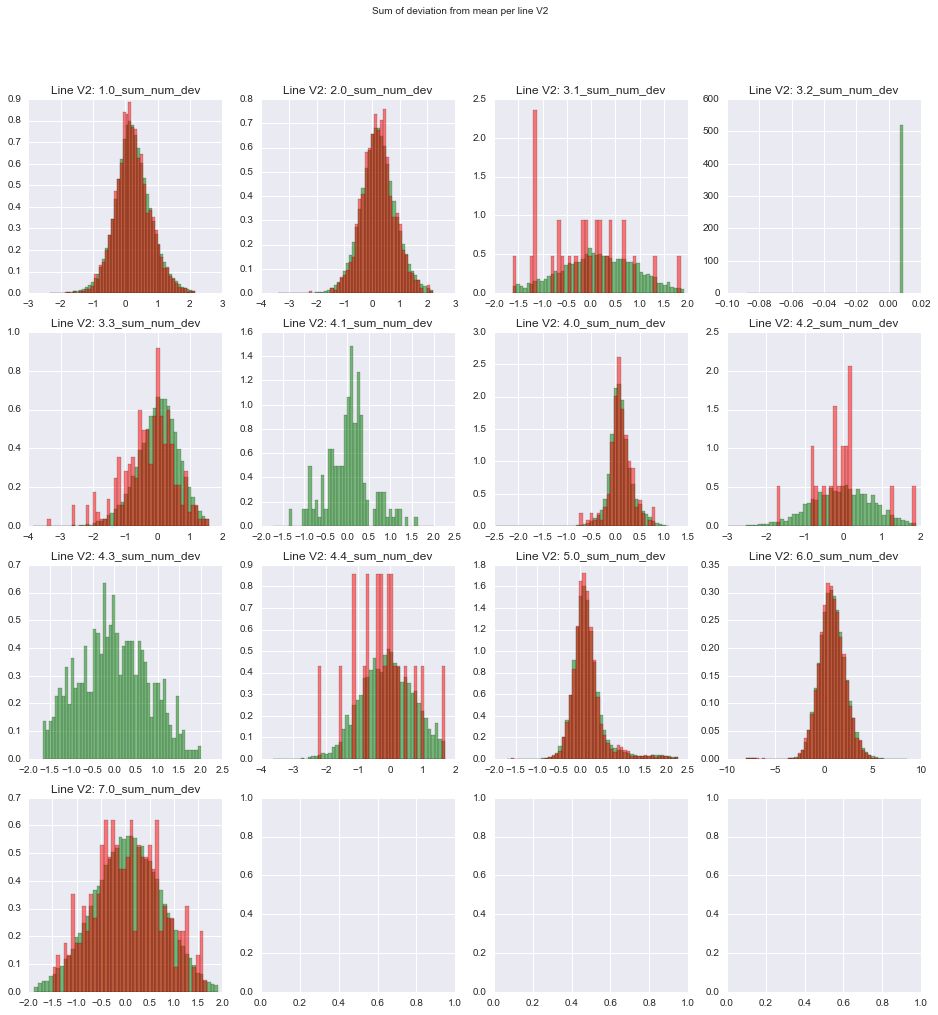

In [153]:
data0 = feat_num_sum[feat_num_sum['R']==0]
data1 = feat_num_sum[feat_num_sum['R']==1]

f, ax = plt.subplots(4,4, figsize=(16,16))
f.suptitle('Sum of deviation from mean per line V2')

n_bins = 50

for i, line_V2 in enumerate(line_cols):
    
    ran = [feat_num_sum[line_V2].min()/2, feat_num_sum[line_V2].max()/2]
    #ran = [-0.1, 0.1]
    width = float((ran[1] - ran[0]))/n_bins
    
    freq0, bins = np.histogram(data0[line_V2].values, bins=n_bins, density=True, range=ran)
    freq1, bins = np.histogram(data1[line_V2].values, bins=n_bins, density=True, range=ran)
    
    ax[i / 4, i % 4].bar(bins[1:], freq0, alpha=0.5, color='g', width=width)
    ax[i / 4, i % 4].bar(bins[1:], freq1, alpha=0.5, color='r', width=width)
    
    ax[i / 4, i % 4].set_title('Line V2: {}'.format(line_V2))

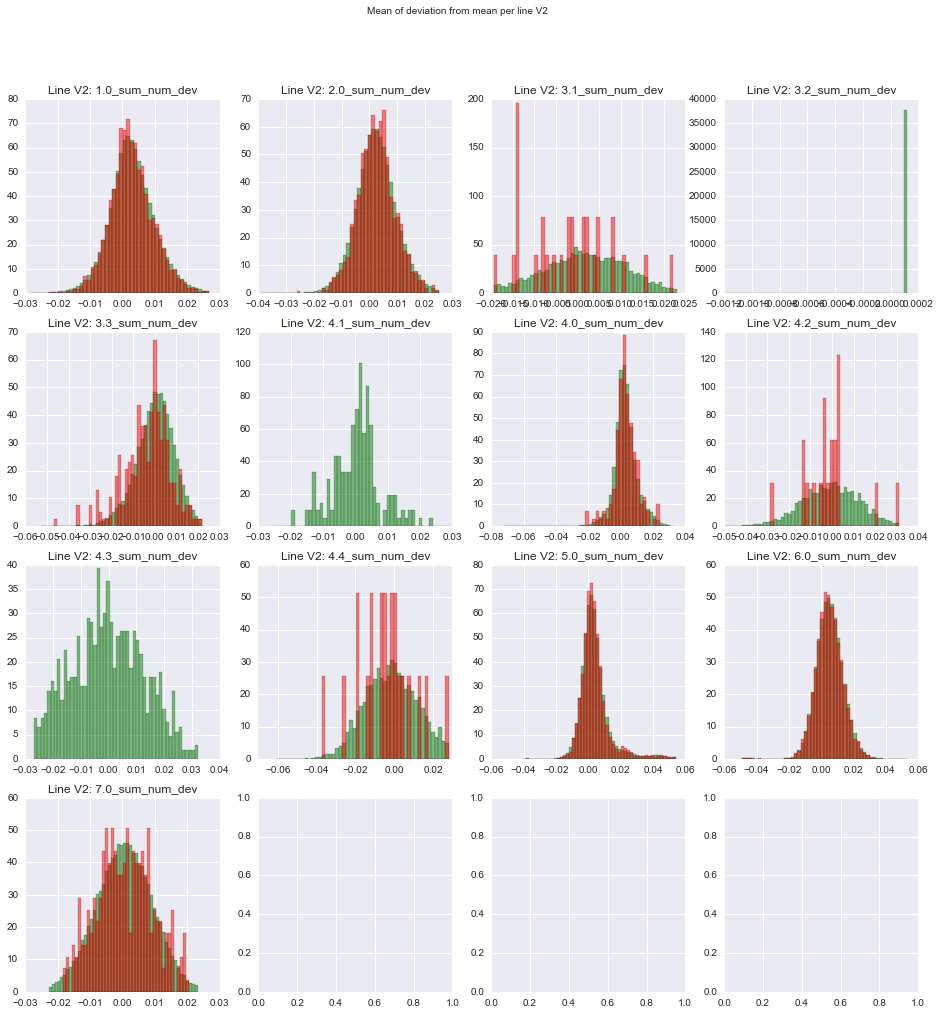

In [154]:
data0 = feat_num_mean[feat_num_mean['R']==0]
data1 = feat_num_mean[feat_num_mean['R']==1]

f, ax = plt.subplots(4,4, figsize=(16,16))
f.suptitle('Mean of deviation from mean per line V2')

n_bins = 50

for i, line_V2 in enumerate(line_cols):
    
    ran = [feat_num_mean[line_V2].min()/2, feat_num_mean[line_V2].max()/2]
    #ran = [-0.1, 0.1]
    width = float((ran[1] - ran[0]))/n_bins
    
    freq0, bins = np.histogram(data0[line_V2].values, bins=n_bins, density=True, range=ran)
    freq1, bins = np.histogram(data1[line_V2].values, bins=n_bins, density=True, range=ran)
    
    ax[i / 4, i % 4].bar(bins[1:], freq0, alpha=0.5, color='g', width=width)
    ax[i / 4, i % 4].bar(bins[1:], freq1, alpha=0.5, color='r', width=width)
    
    ax[i / 4, i % 4].set_title('Line V2: {}'.format(line_V2))

## Analyze sum of numeric features per station

In [155]:
station_V2s = lut['station_V2'].unique()
station_cols = ['S' + str(x) + '_sum_num_dev' for x in station_V2s]

In [165]:
feat_num_sum = pd.DataFrame(columns=station_cols, index=ID.Id)
feat_num_mean = pd.DataFrame(columns=station_cols, index=ID.Id)
#feat_num_std = pd.DataFrame(columns=line_cols, index=ID.Id)
#feat_num_kurt = pd.DataFrame(columns=line_cols, index=ID.Id)

for station_V2, col in zip(station_V2s, station_cols):
    print('Analyzing station V2 {}'.format(station_V2))
    num_cols = lut[lut['station_V2']==station_V2].col_num.values
    
    num_cols = num_cols[~np.isnan(num_cols)]
    
    feat_num_sum[col] = num_data[:,num_cols].sum(1).A1
    if num_data[:,num_cols].shape[1]>0:
        feat_num_mean[col] = num_data[:,num_cols].mean(1).A1

Analyzing station V2 0.0
Analyzing station V2 1.0
Analyzing station V2 2.0
Analyzing station V2 3.0
Analyzing station V2 4.0
Analyzing station V2 5.0
Analyzing station V2 6.0
Analyzing station V2 7.0
Analyzing station V2 8.0
Analyzing station V2 9.0
Analyzing station V2 10.0
Analyzing station V2 11.0
Analyzing station V2 12.0
Analyzing station V2 13.0
Analyzing station V2 14.0
Analyzing station V2 15.0
Analyzing station V2 16.0
Analyzing station V2 17.0
Analyzing station V2 18.0
Analyzing station V2 19.0
Analyzing station V2 20.0
Analyzing station V2 21.0
Analyzing station V2 22.0
Analyzing station V2 23.0
Analyzing station V2 24.1
Analyzing station V2 24.101
Analyzing station V2 24.102
Analyzing station V2 24.103
Analyzing station V2 24.104
Analyzing station V2 24.105
Analyzing station V2 24.106
Analyzing station V2 24.107
Analyzing station V2 24.108
Analyzing station V2 24.109
Analyzing station V2 24.11
Analyzing station V2 24.111
Analyzing station V2 24.2
Analyzing station V2 24.201

In [1]:
feat_num_sum

NameError: name 'feat_num_sum' is not defined

In [166]:
# Store result
feat_num_sum.to_csv(os.path.join(const.DATA_PATH, 'feat_set_numeric_detrended_sum_stationV2.csv'), 
                    index_label='ID')

In [167]:
feat_num_sum.replace(0,np.nan, inplace=True)
feat_num_mean.replace(0,np.nan, inplace=True)

feat_num_sum['R'] = y.Response
feat_num_mean['R'] = y.Response

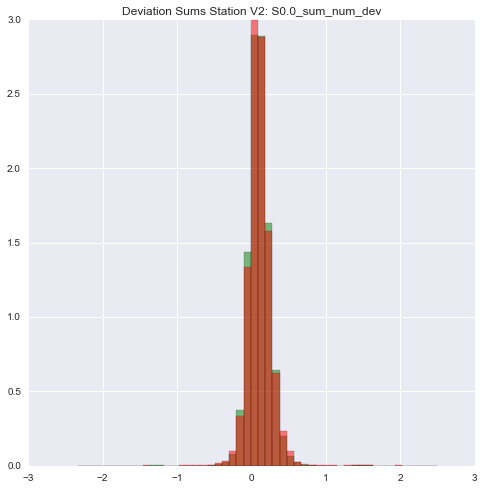

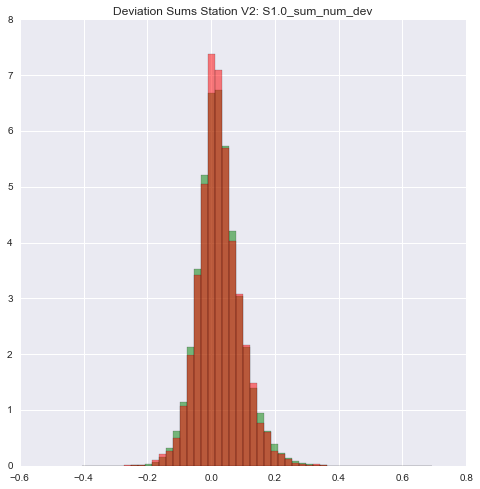

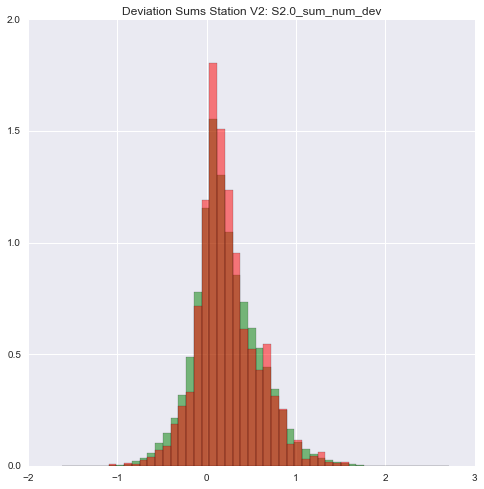

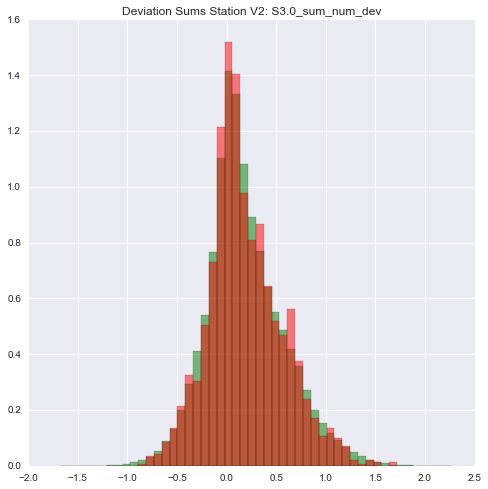

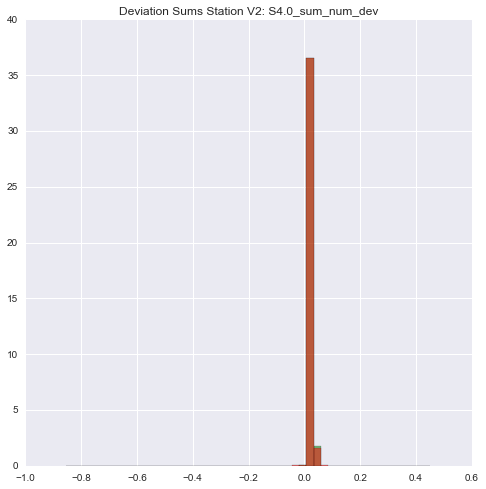

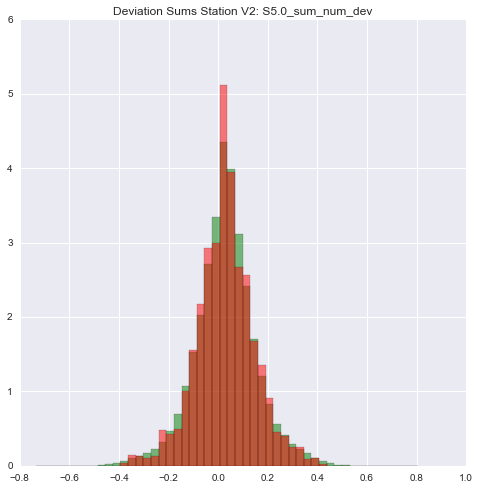

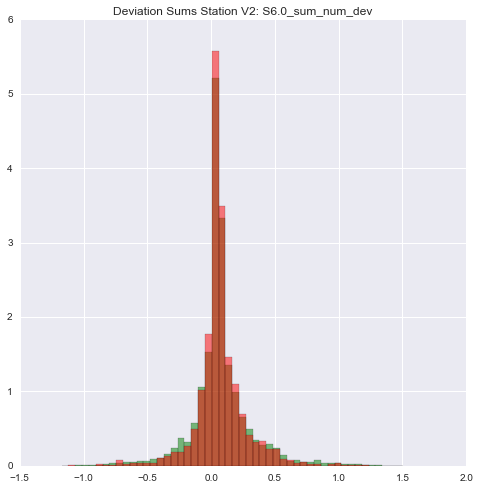

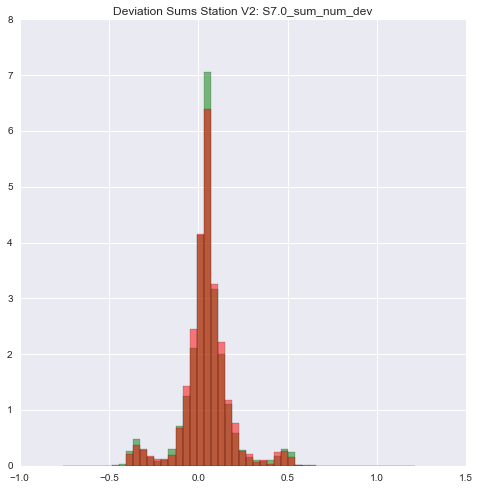

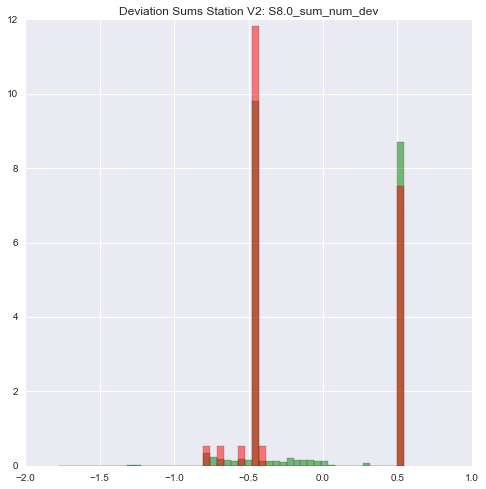

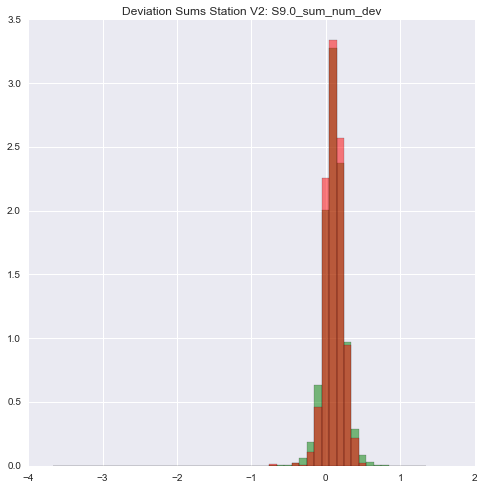

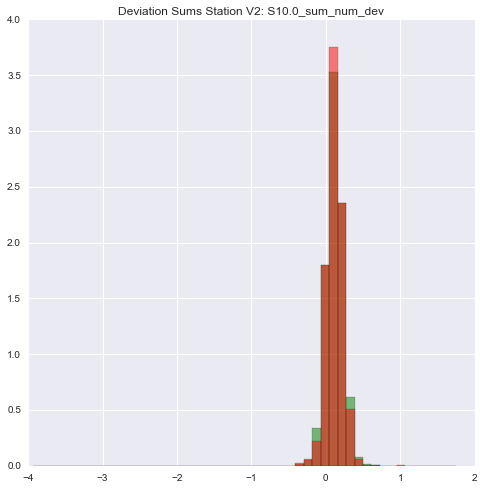

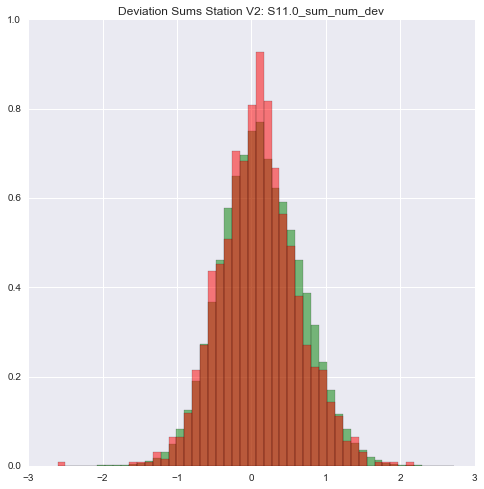

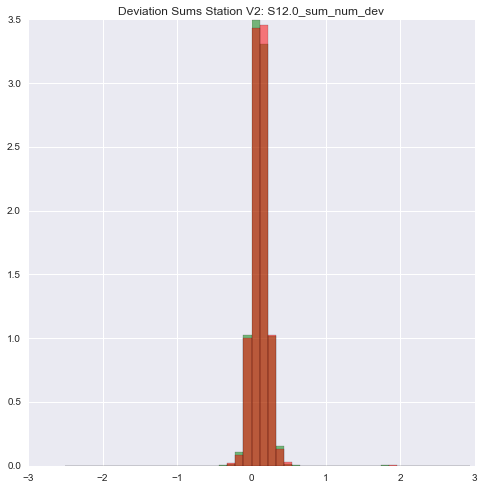

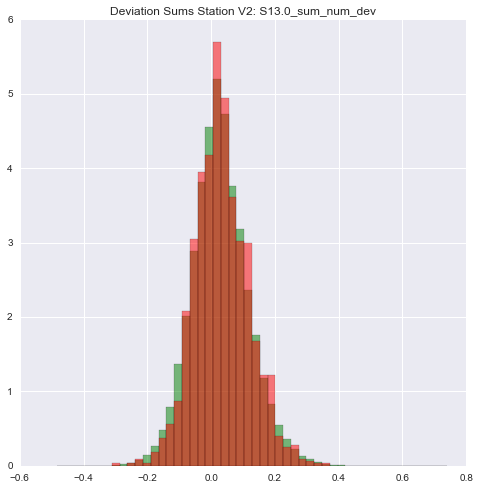

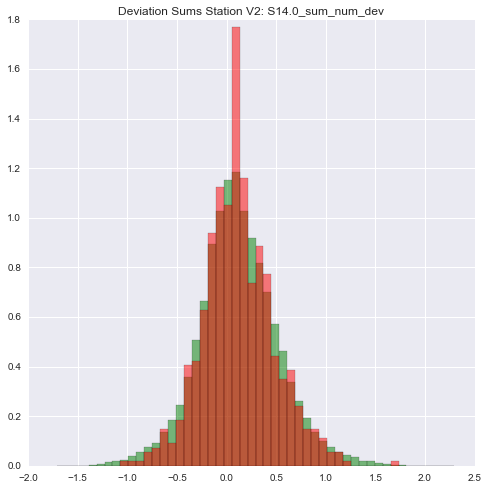

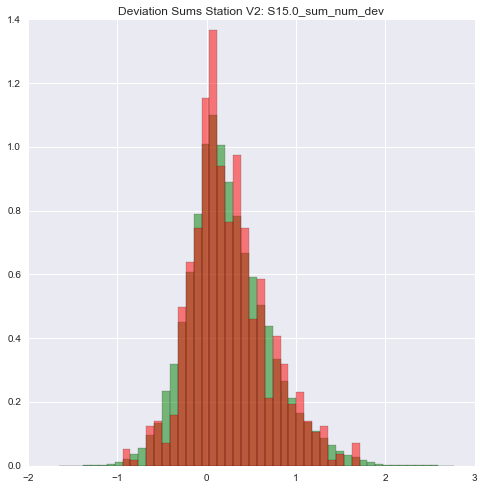

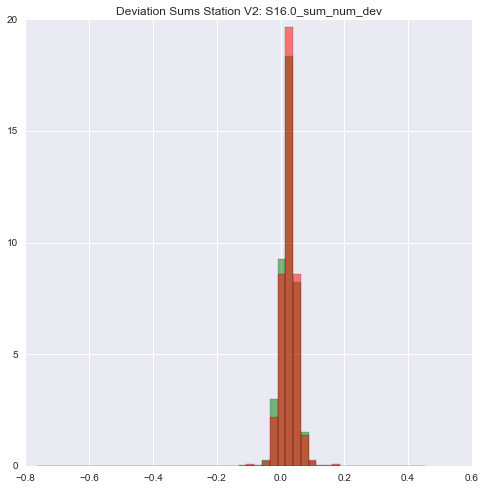

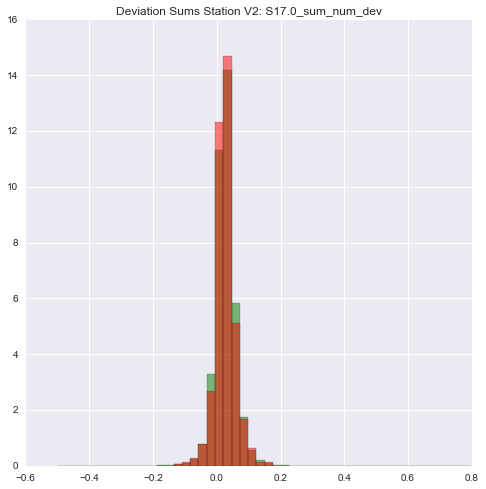

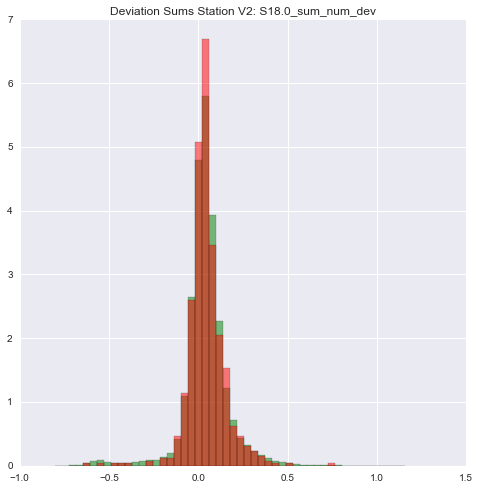

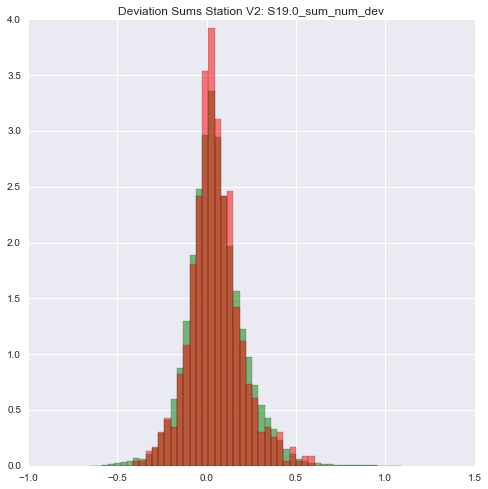

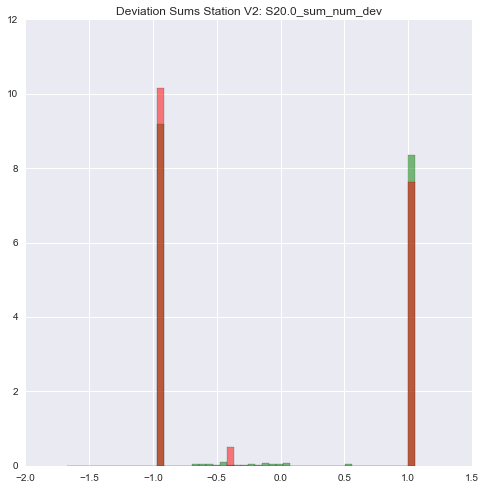

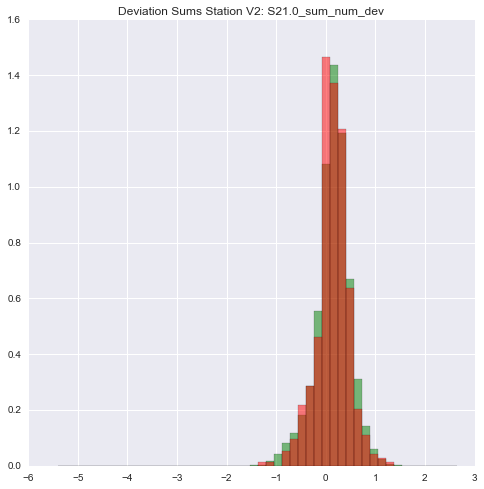

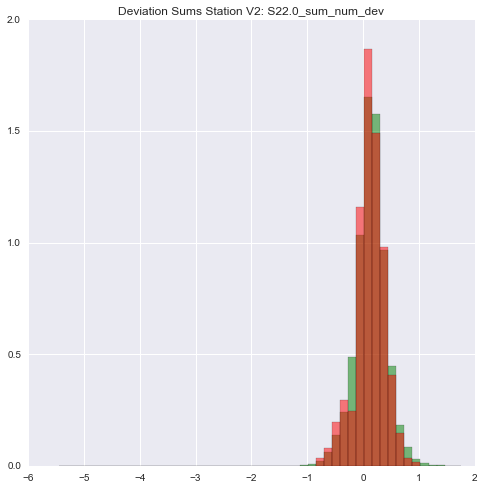

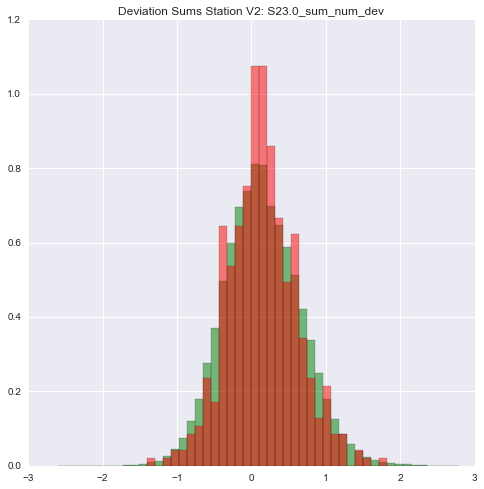

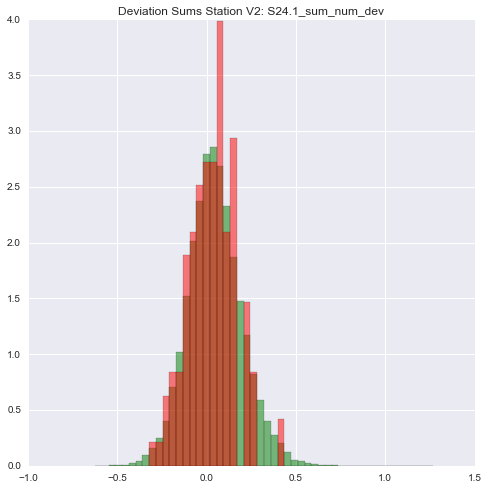

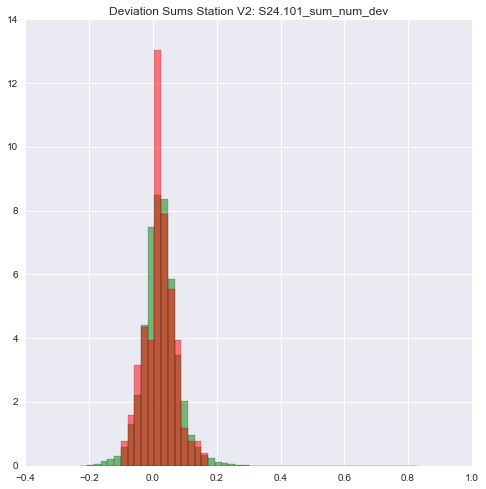

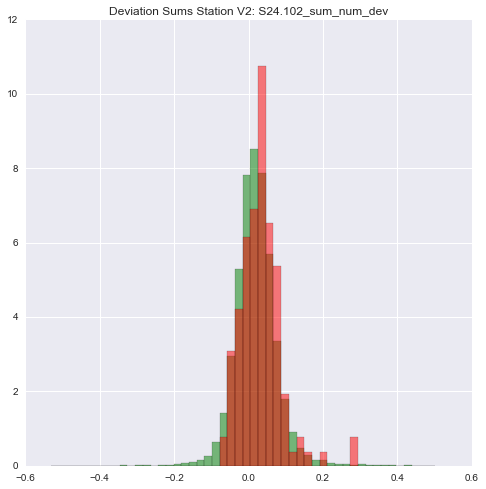

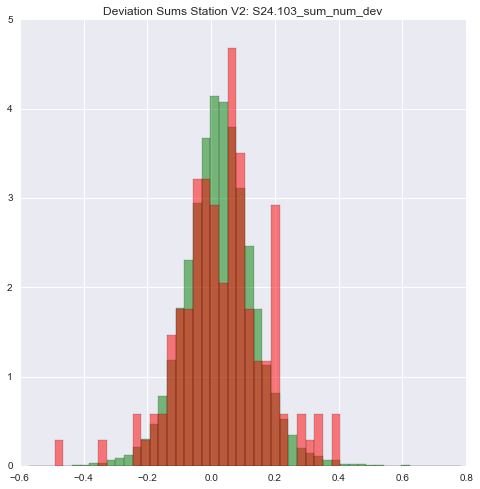

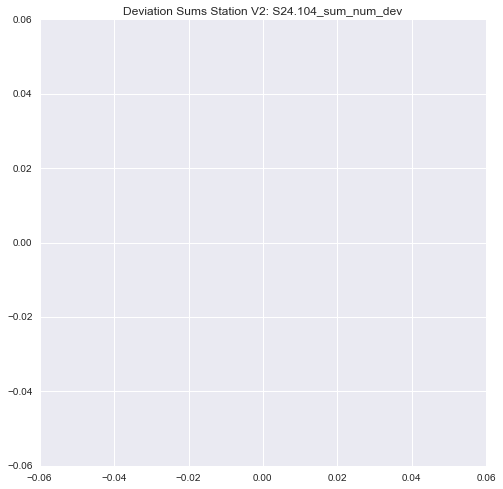

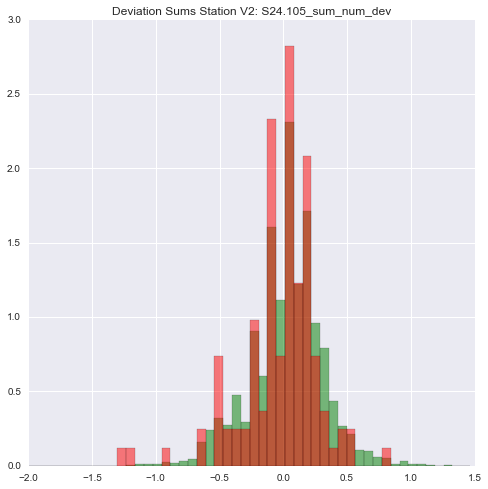

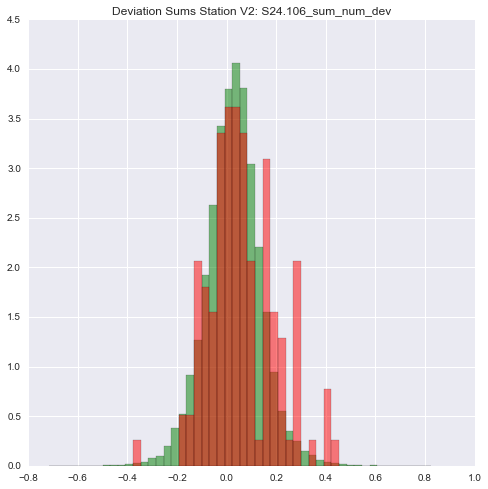

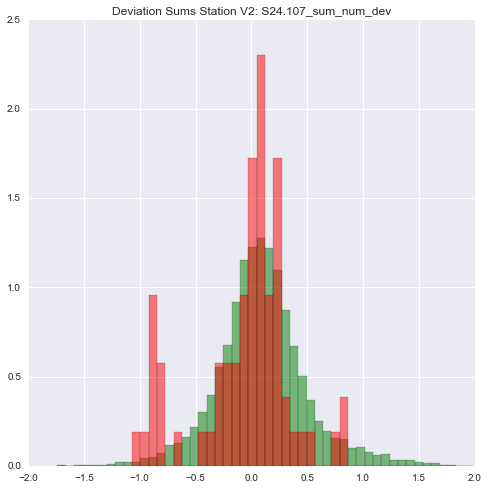

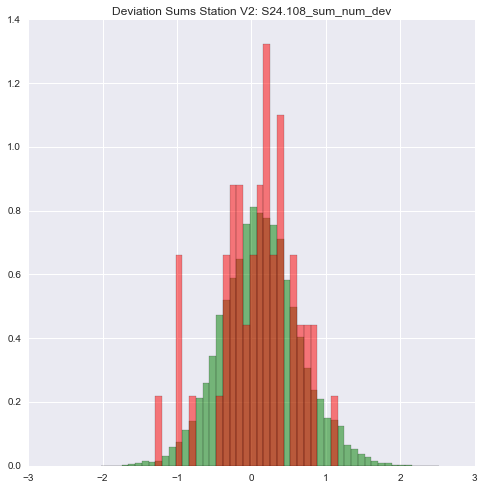

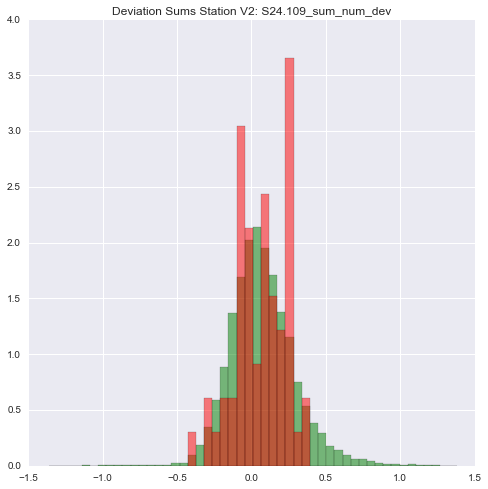

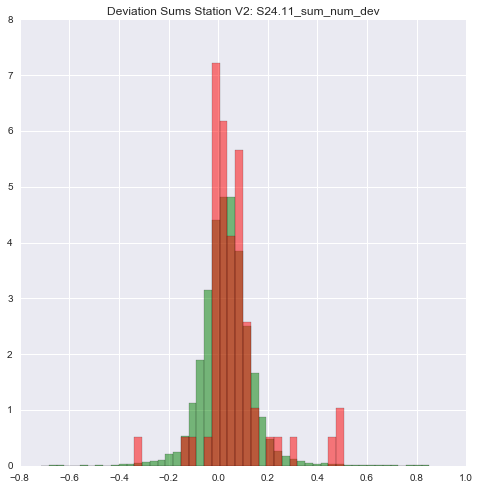

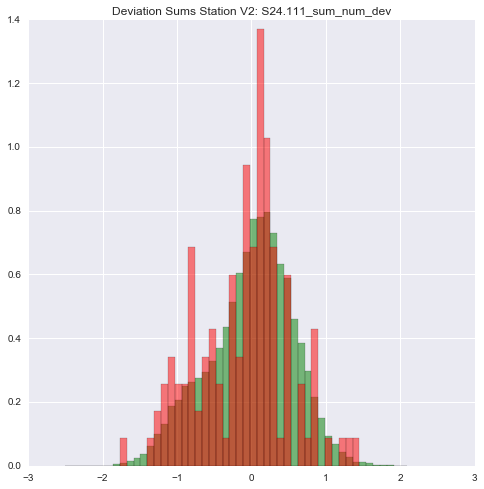

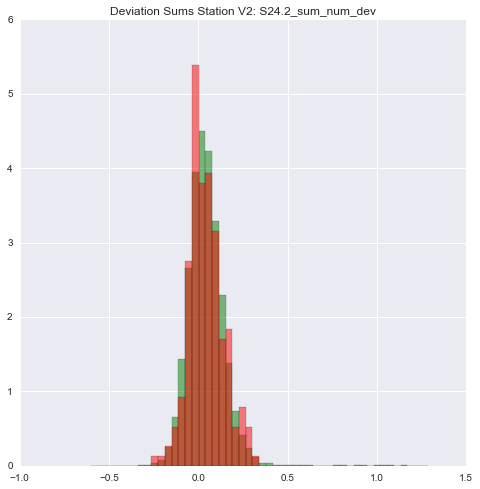

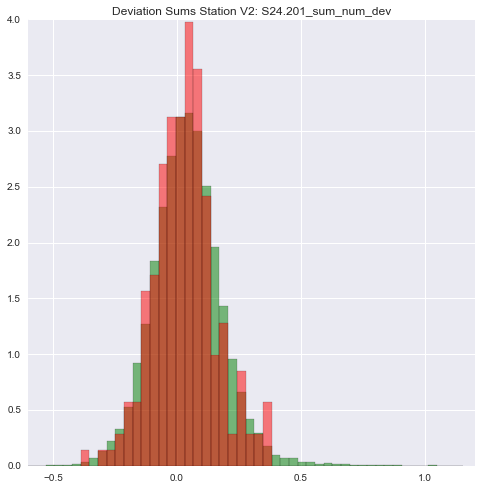

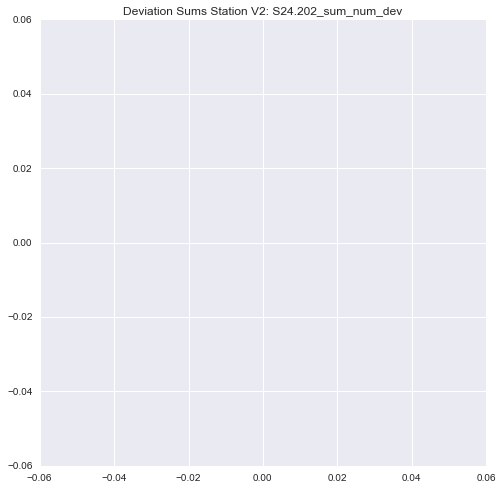

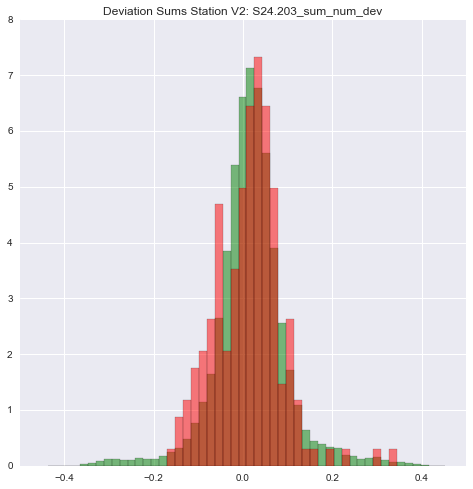

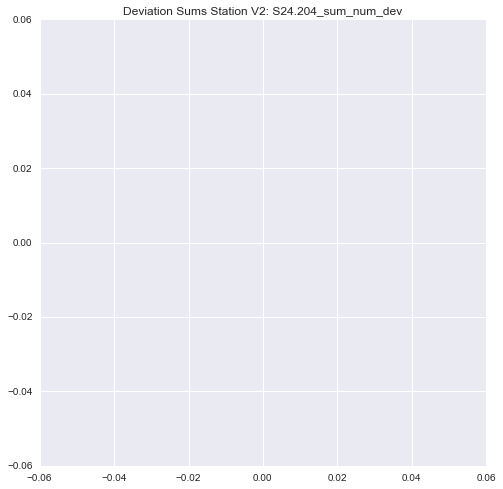

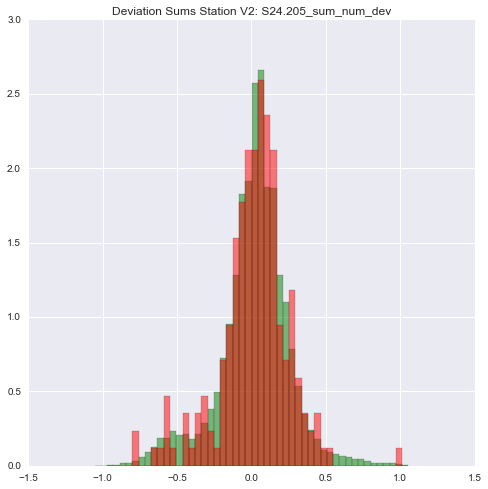

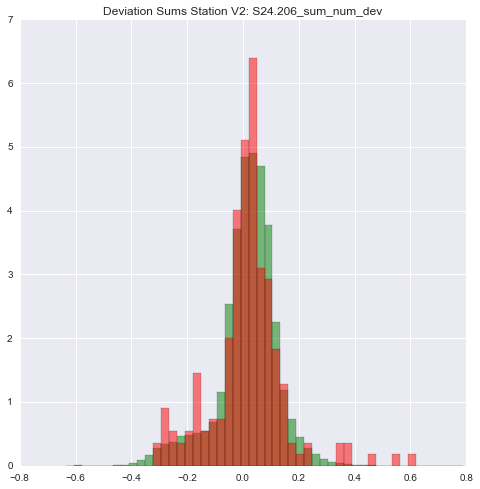

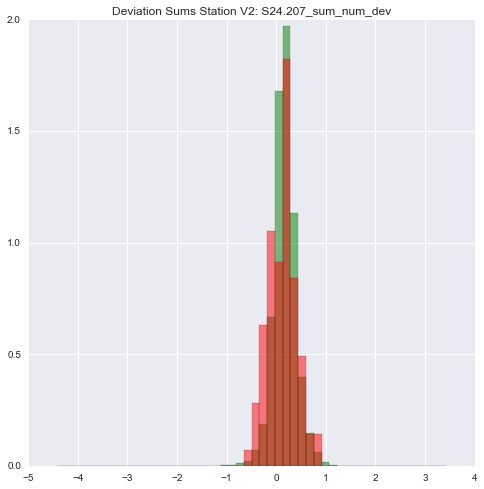

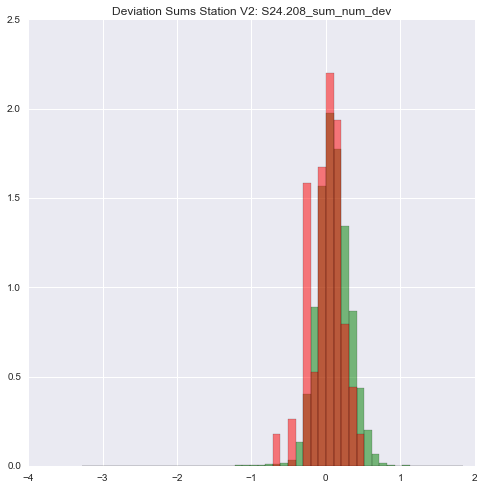

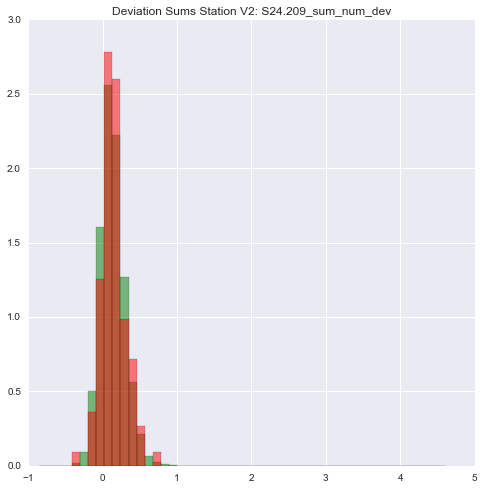

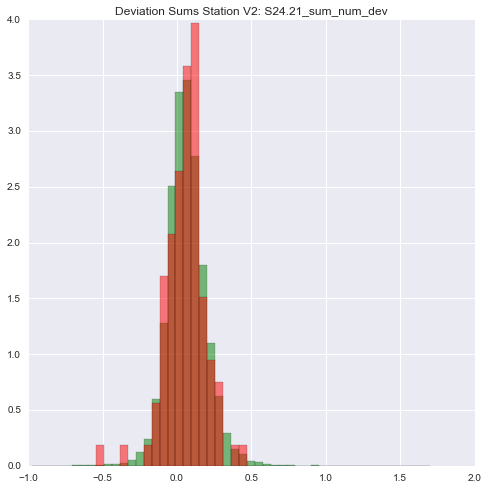

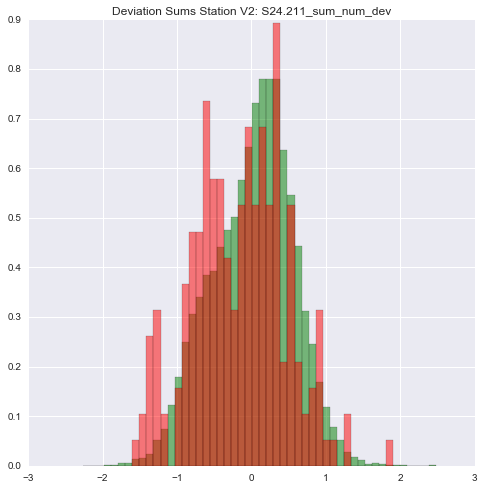

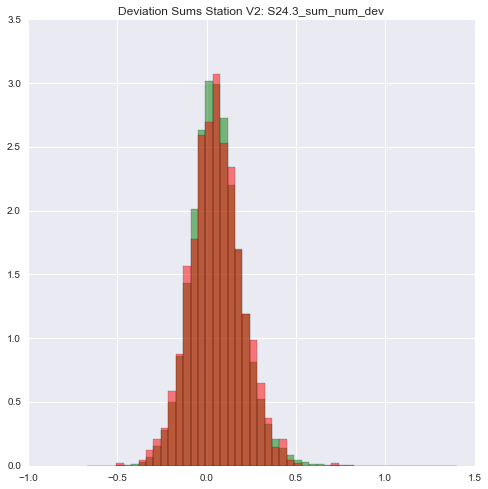

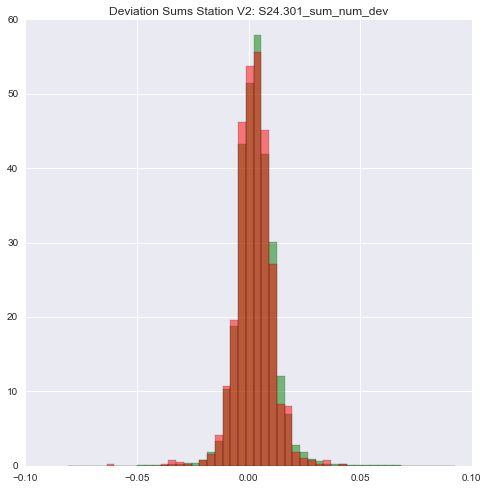

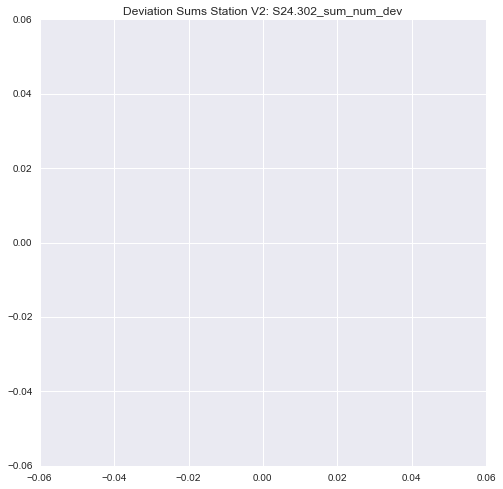

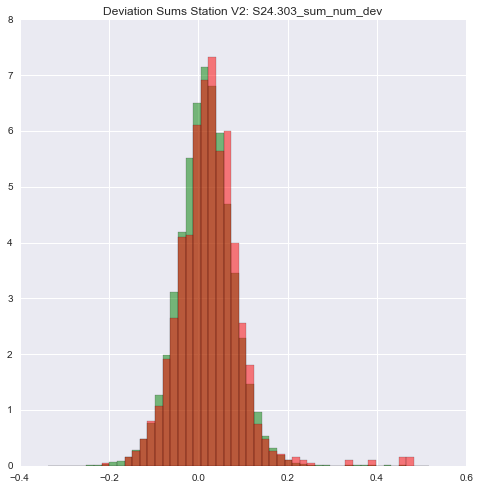

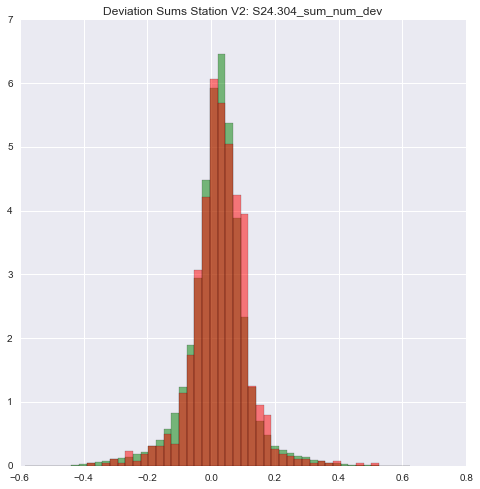

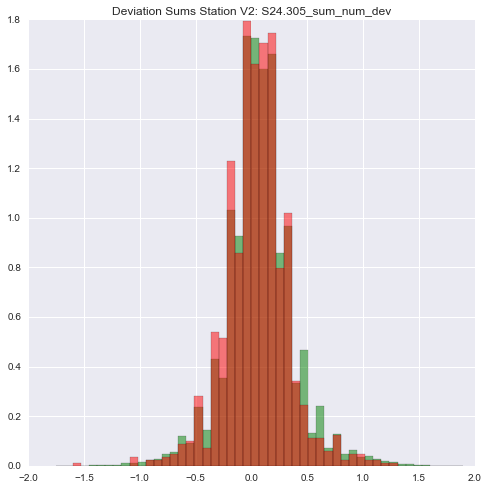

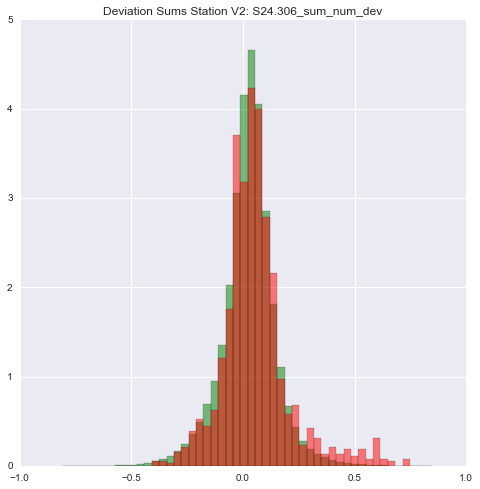

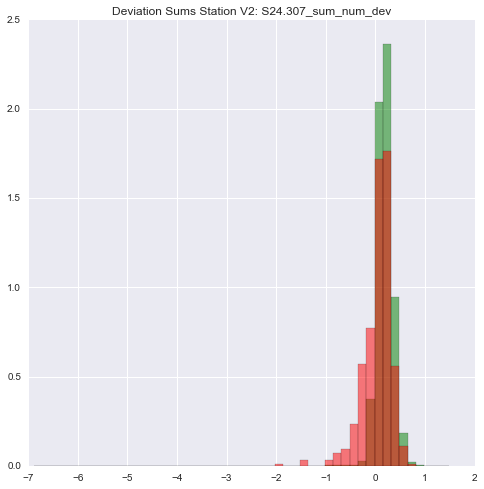

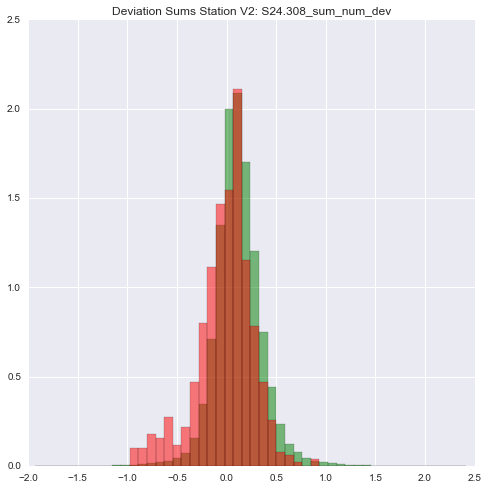

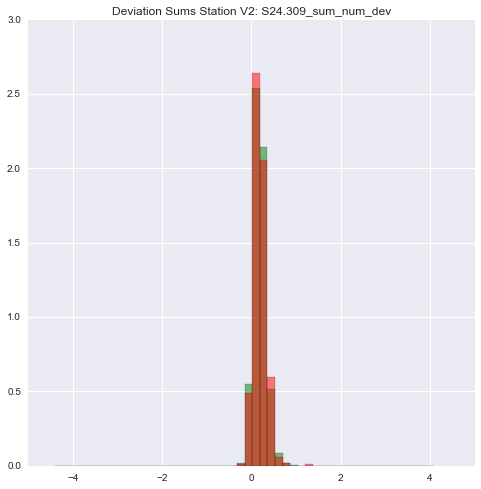

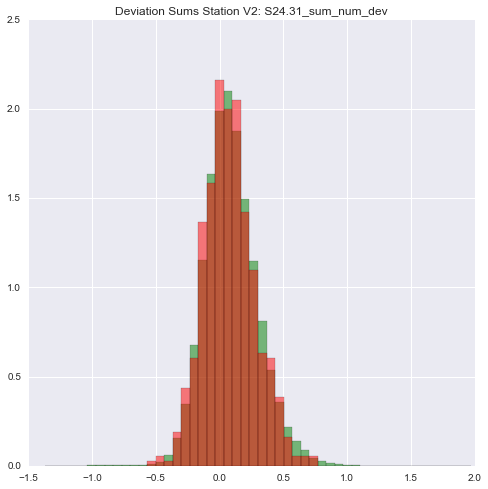

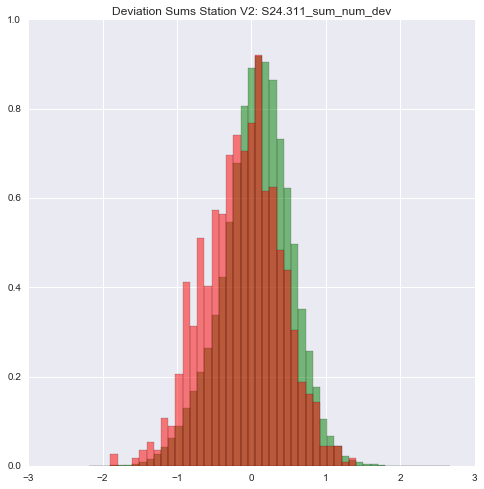

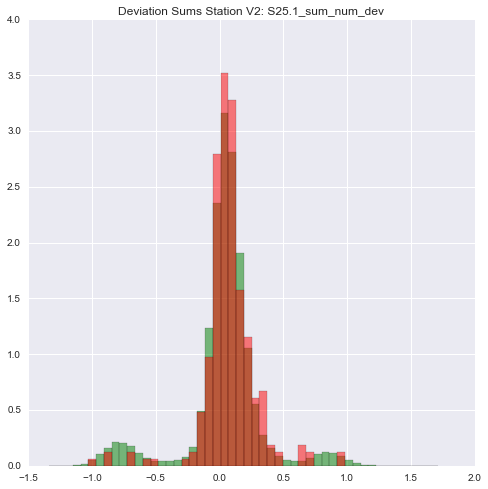

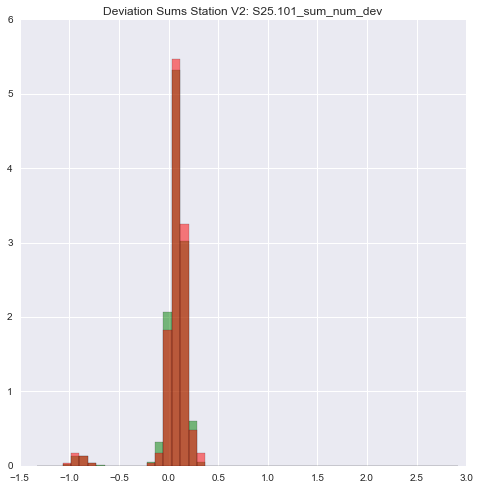

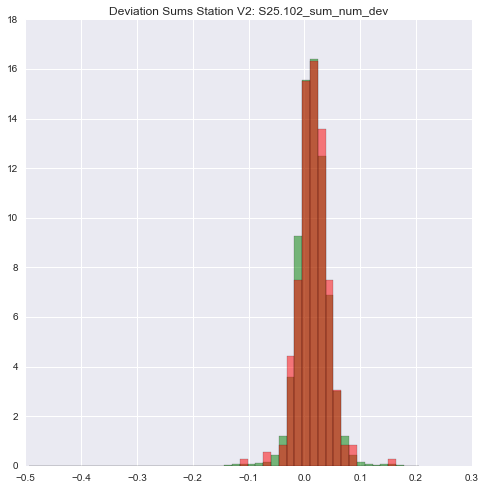

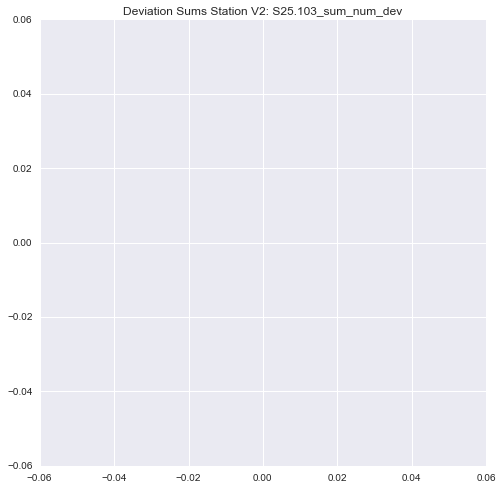

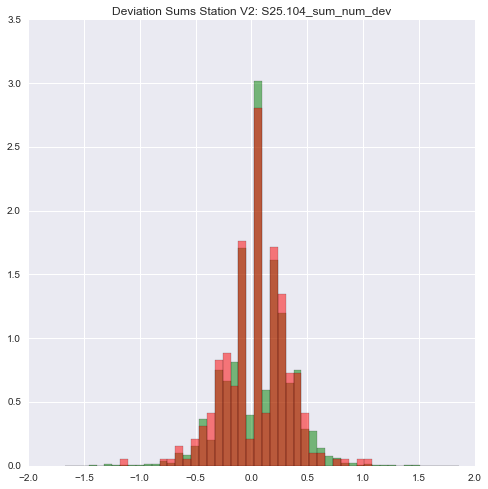

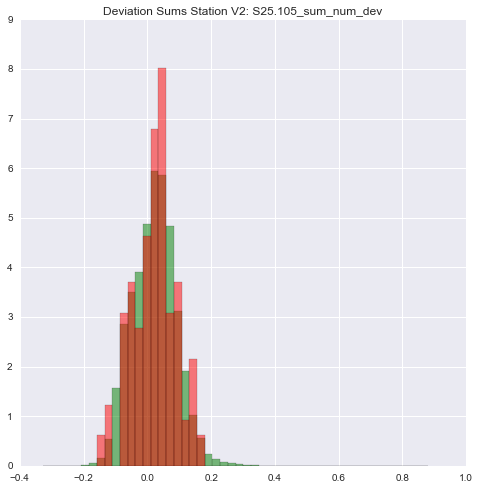

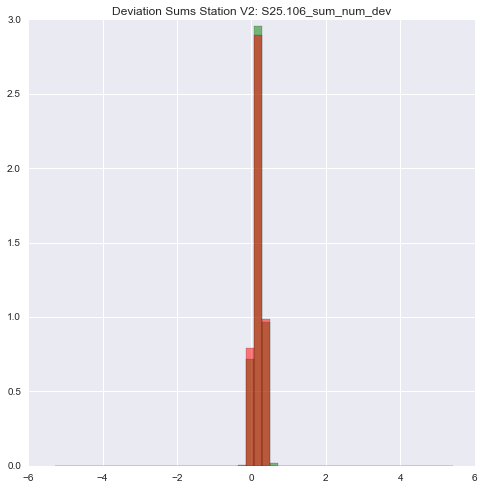

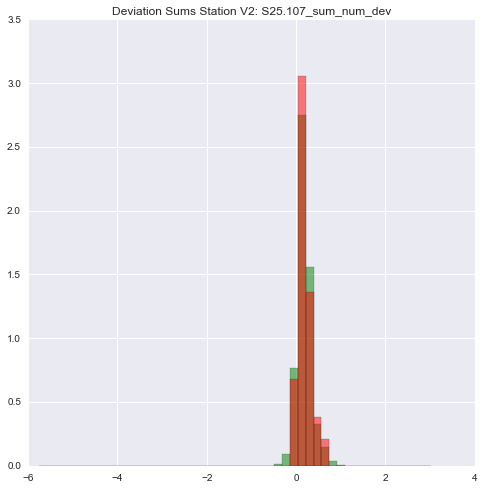

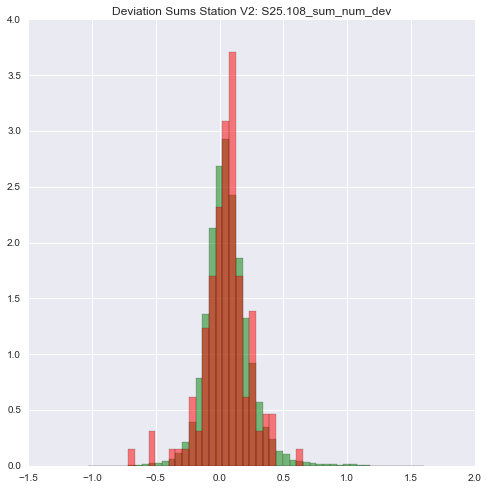

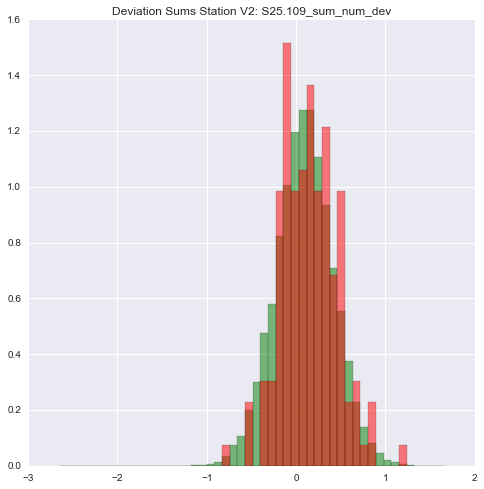

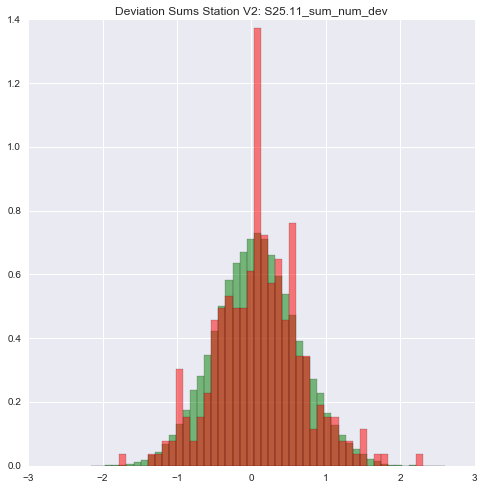

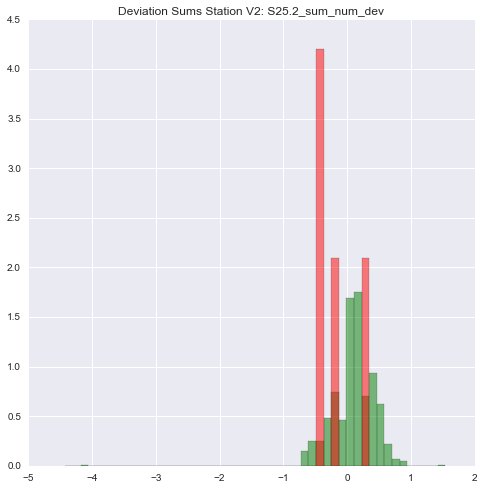

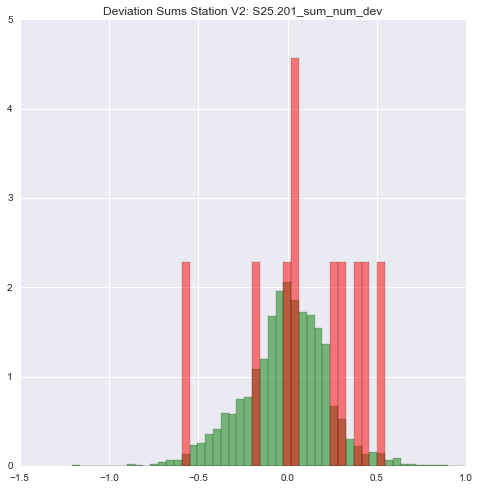

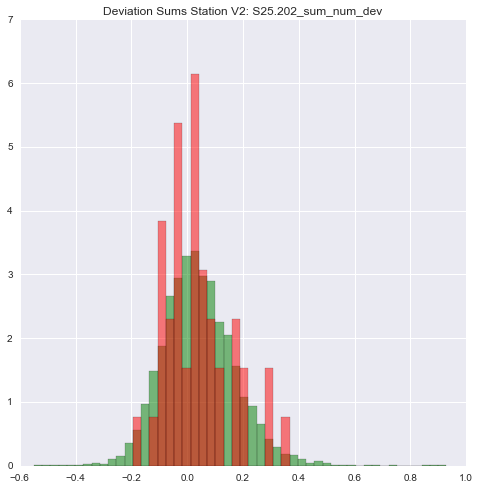

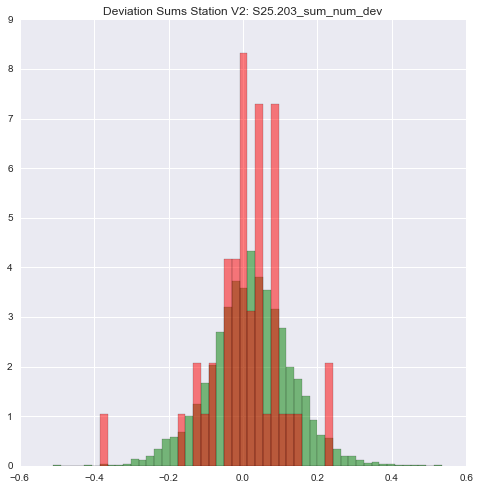

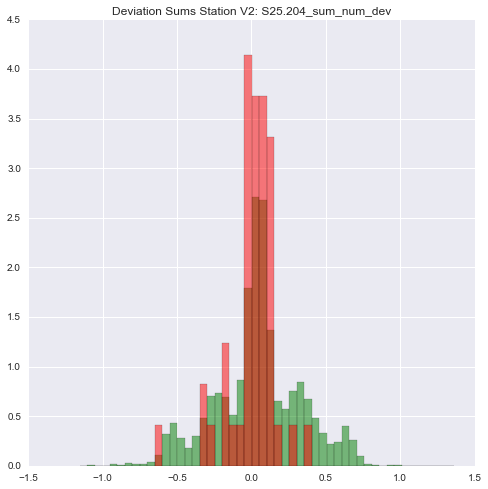

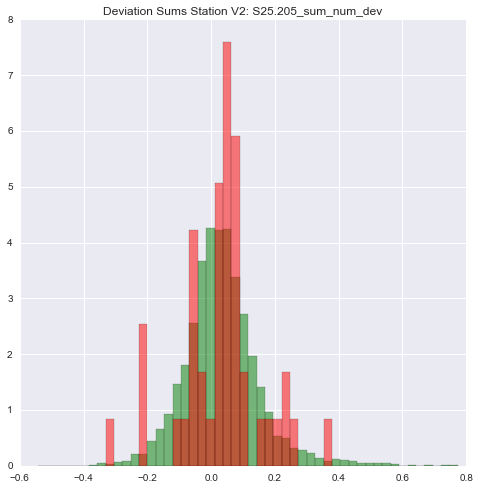

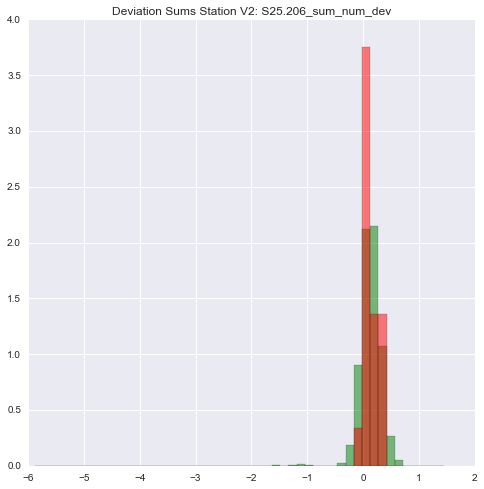

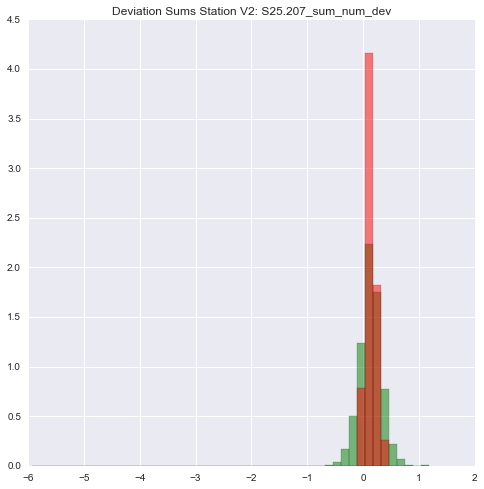

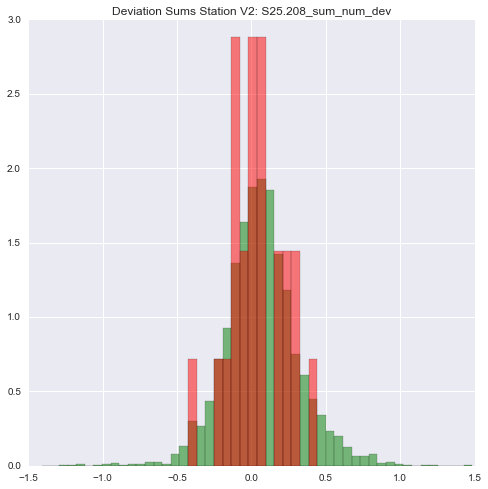

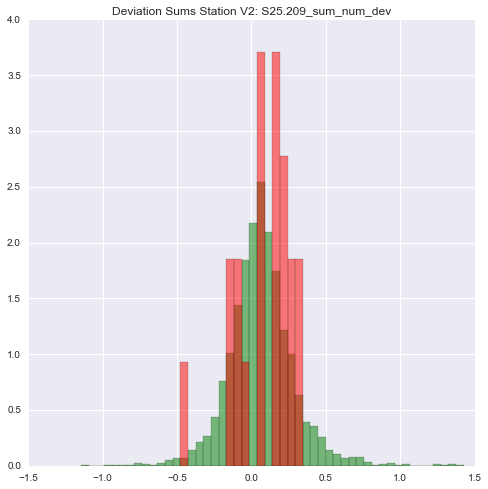

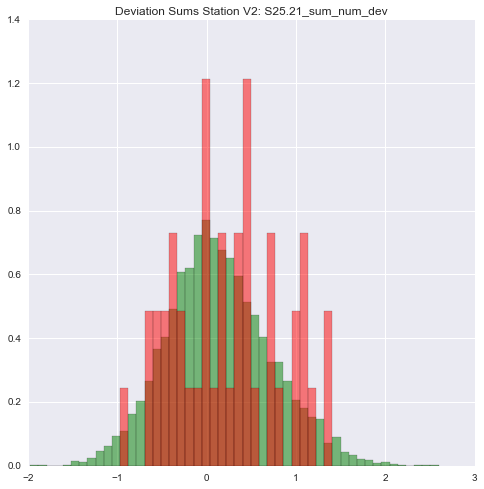

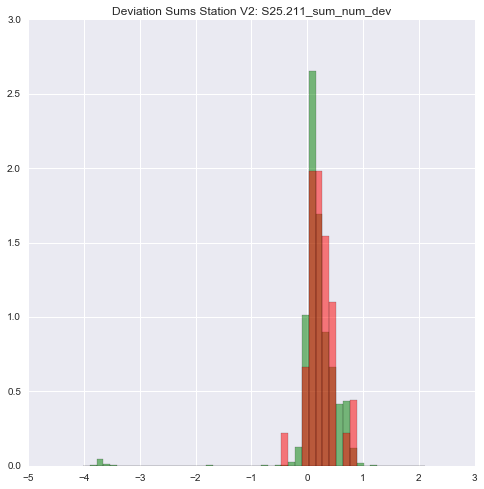

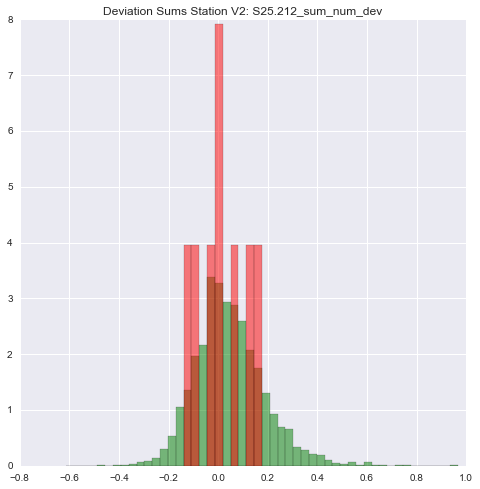

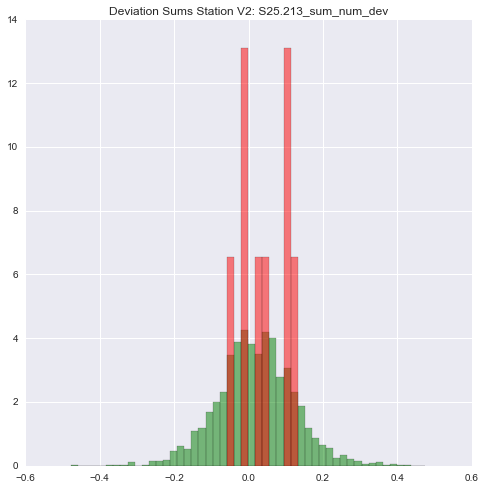

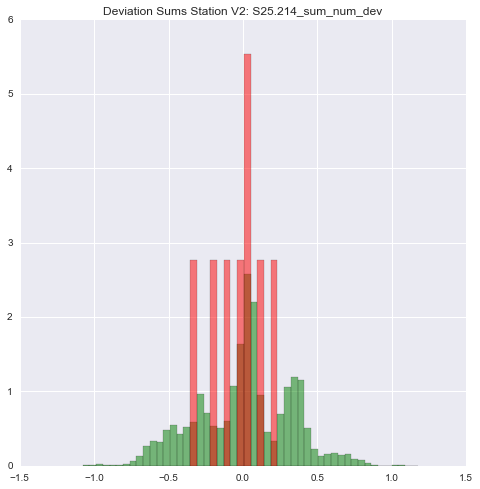

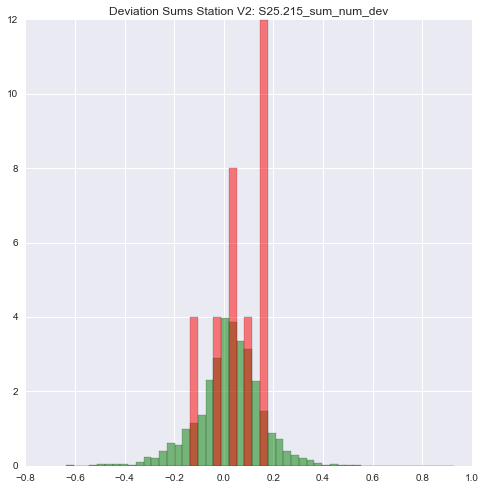

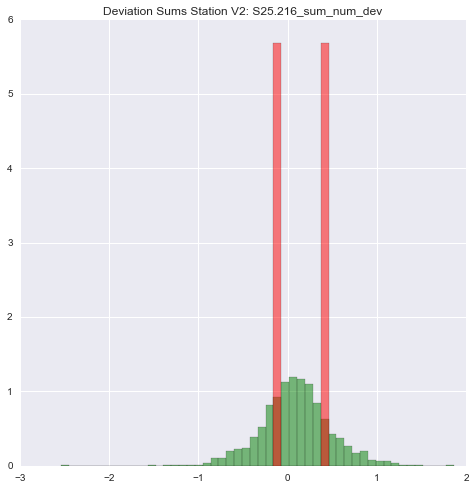

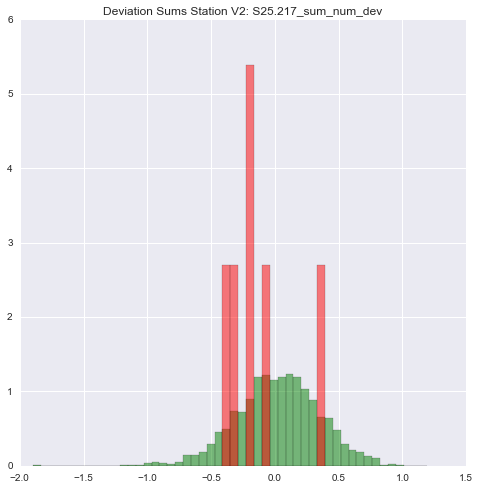

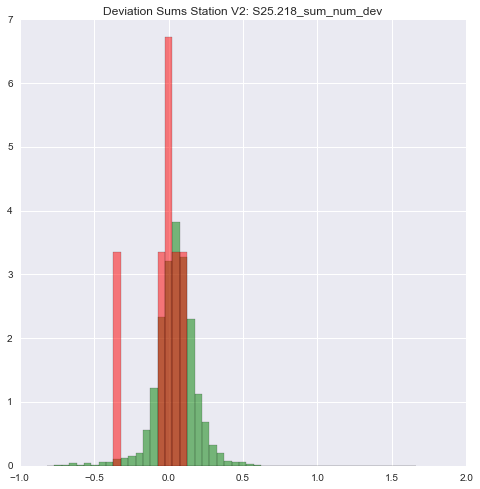

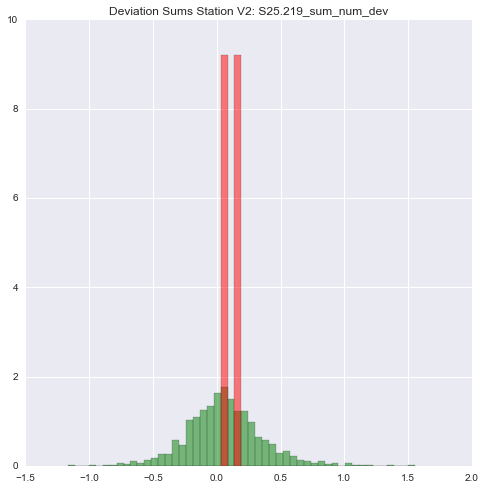

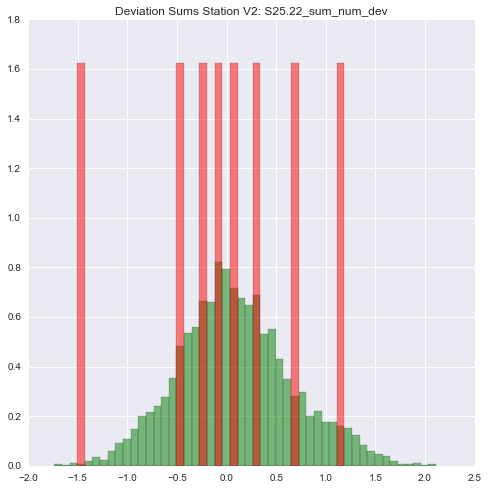

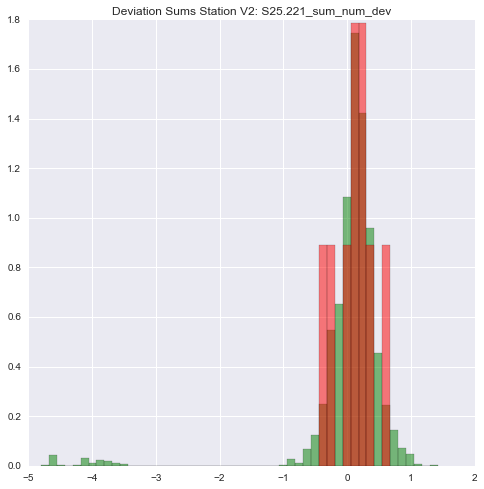

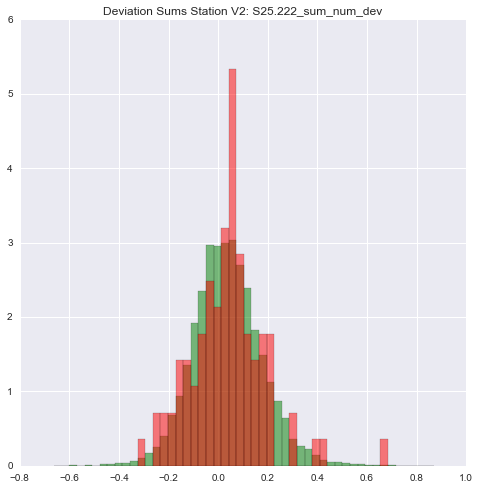

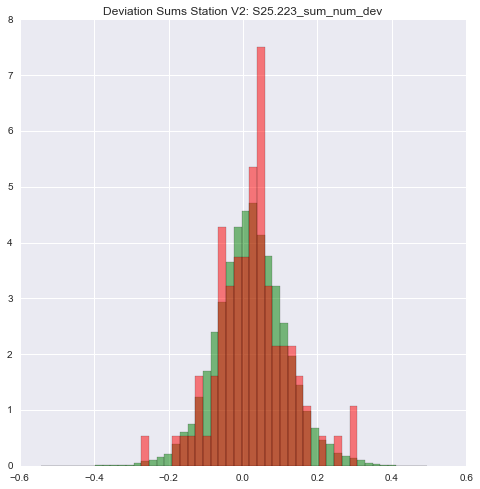

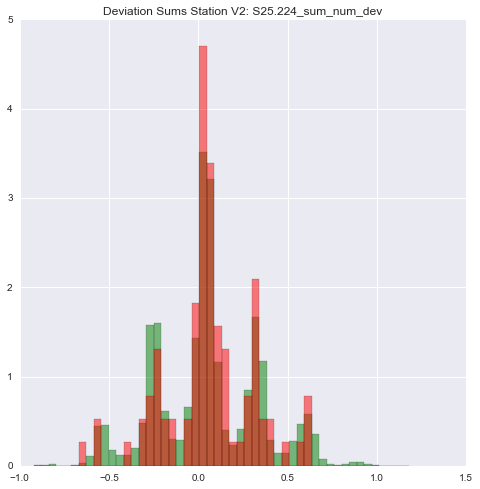

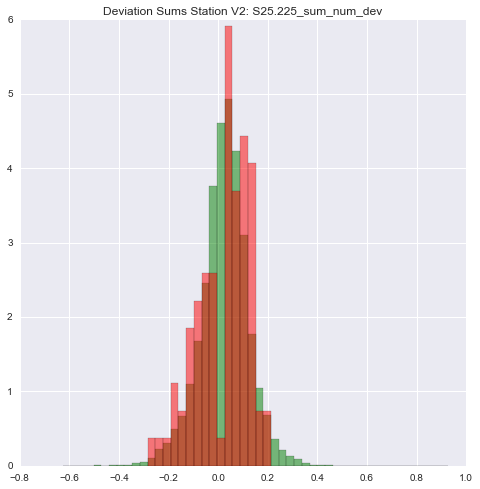

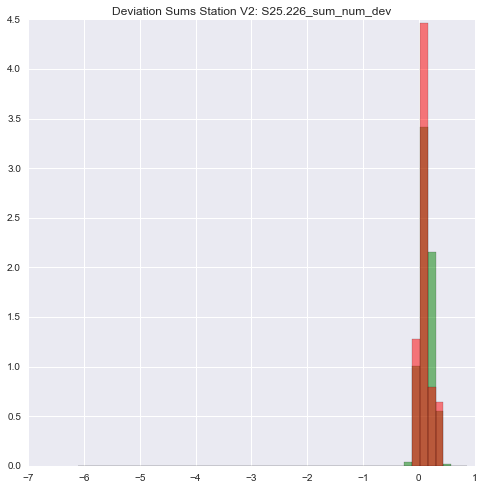

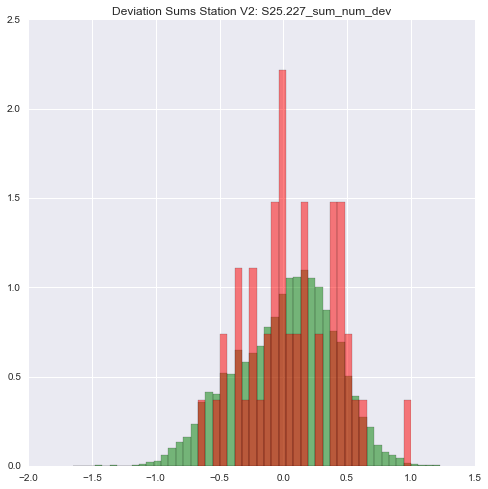

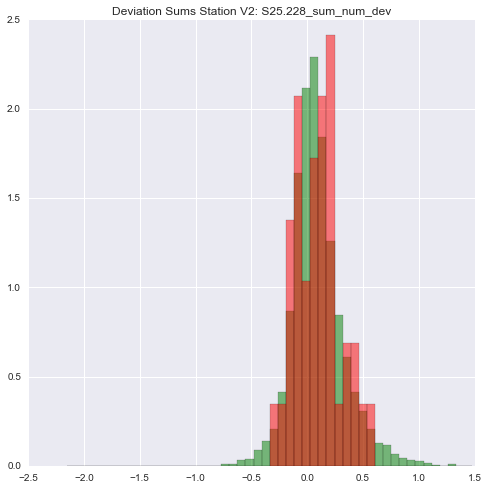

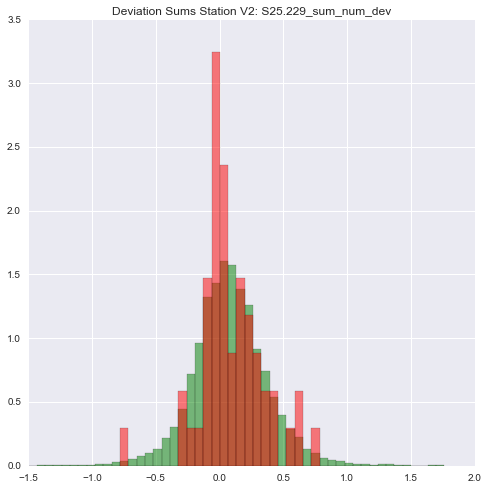

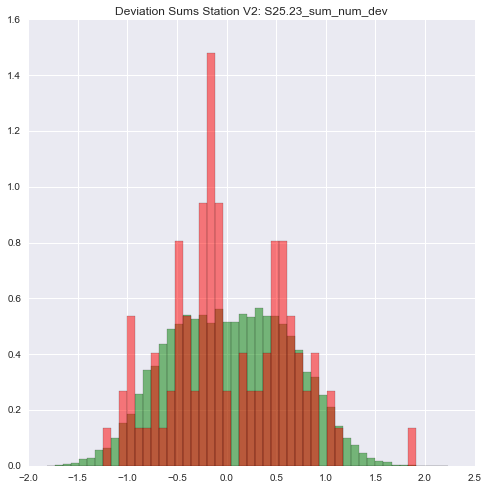

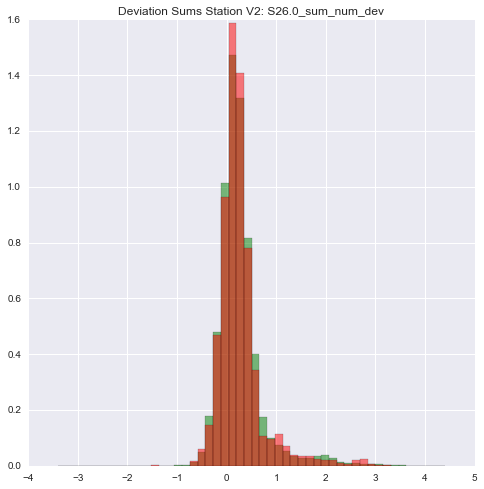

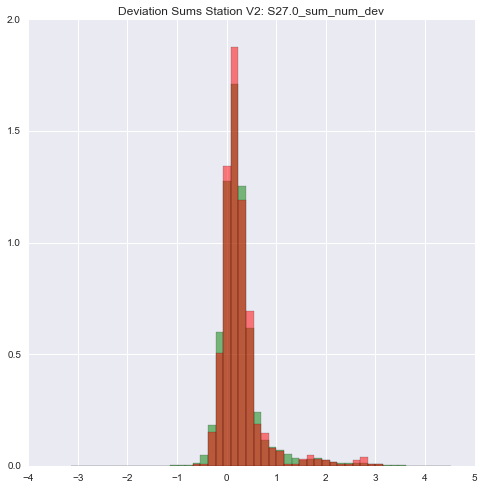

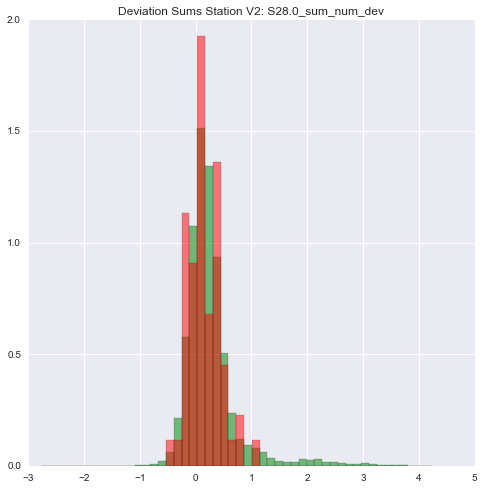

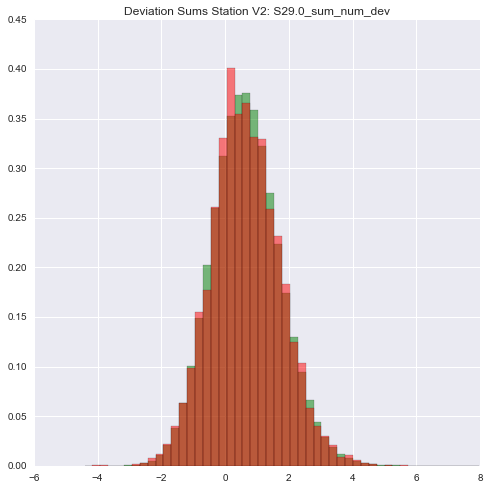

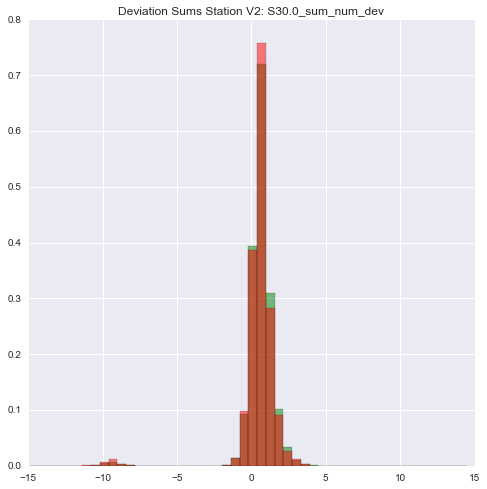

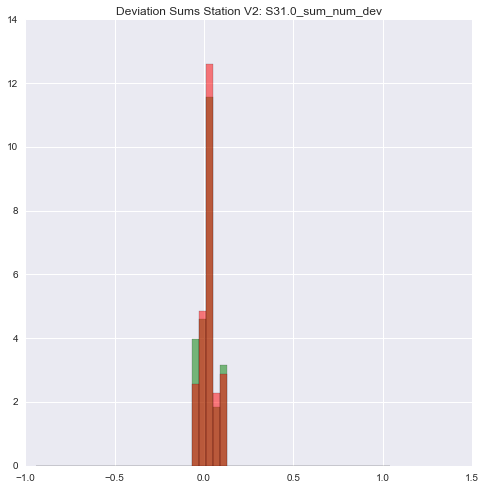

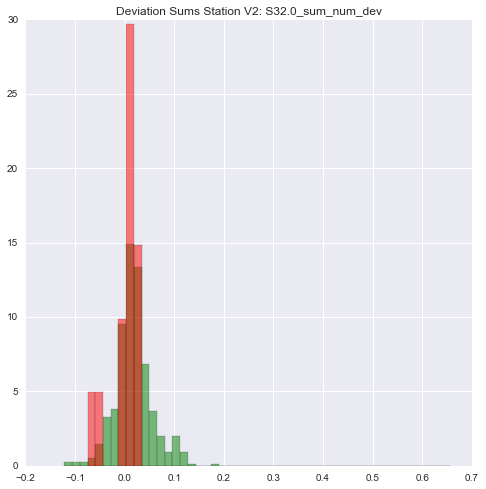

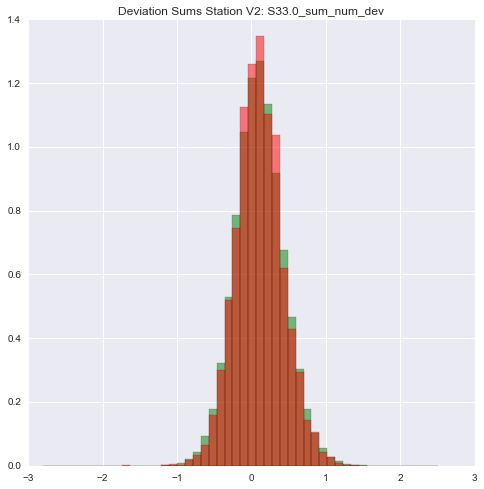

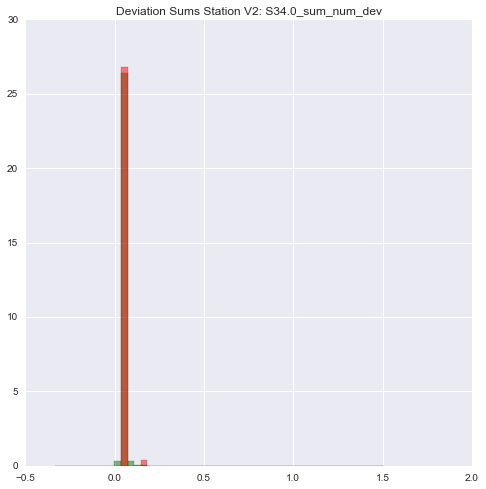

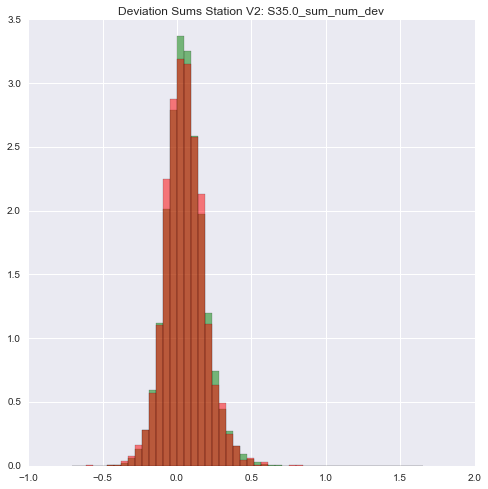

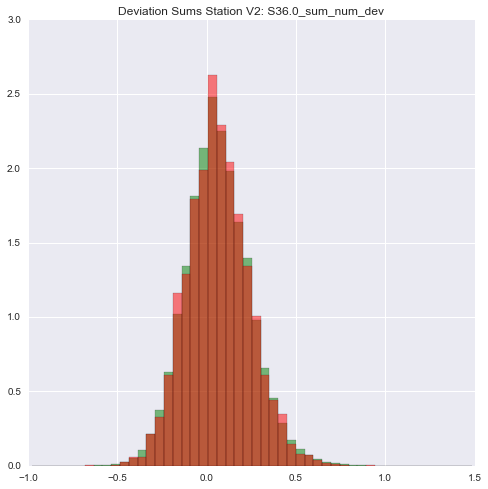

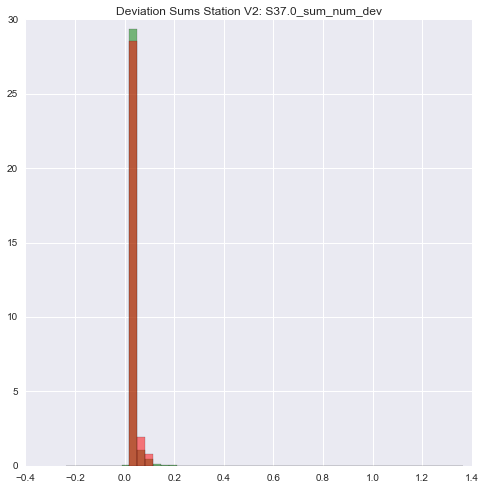

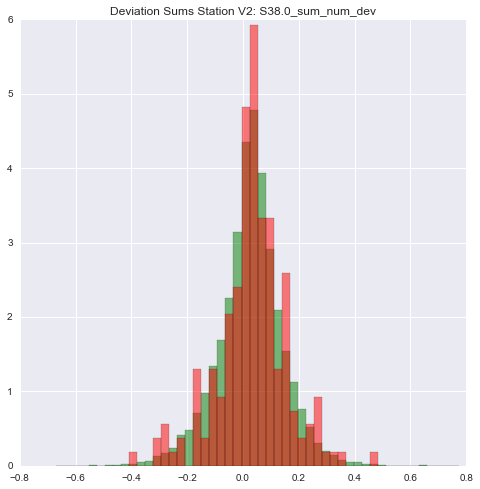

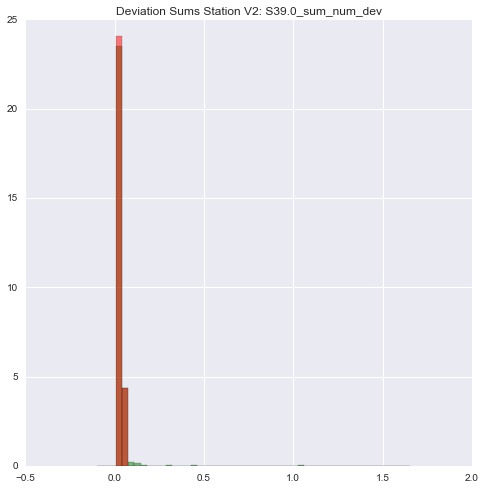

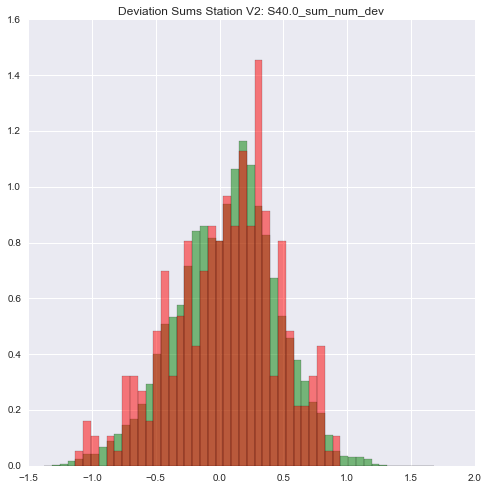

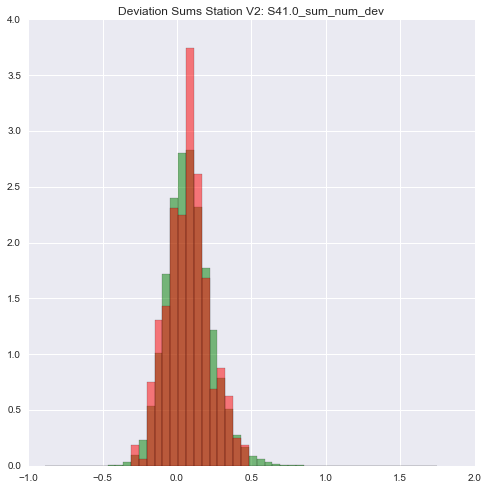

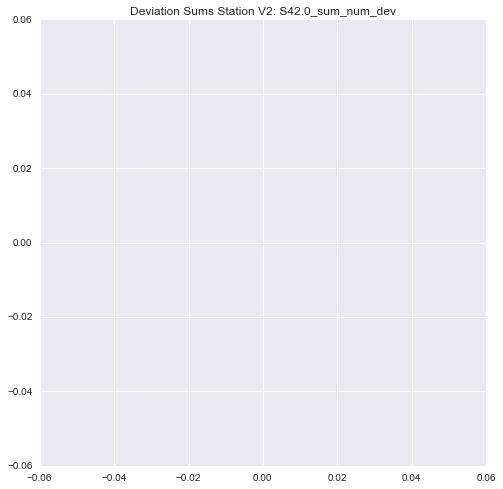

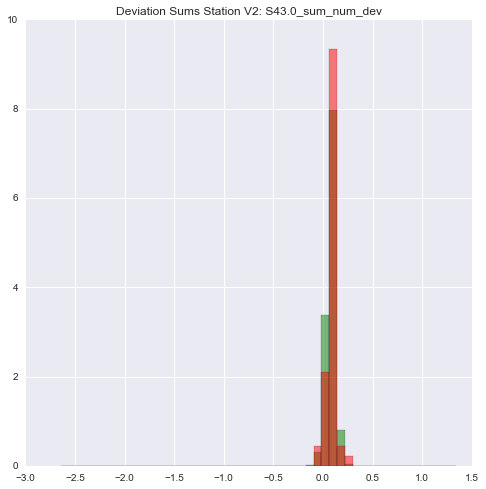

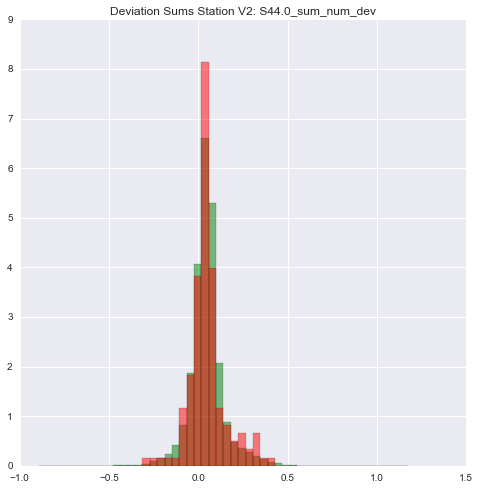

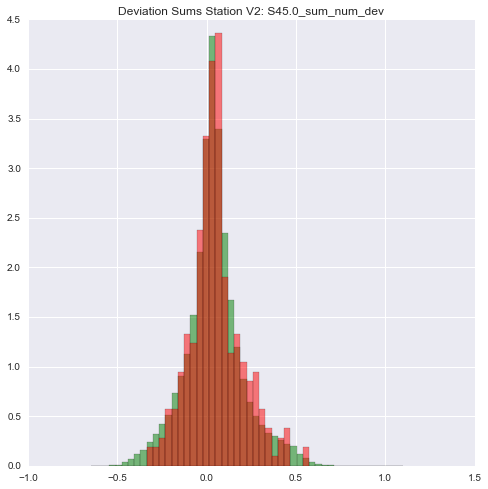

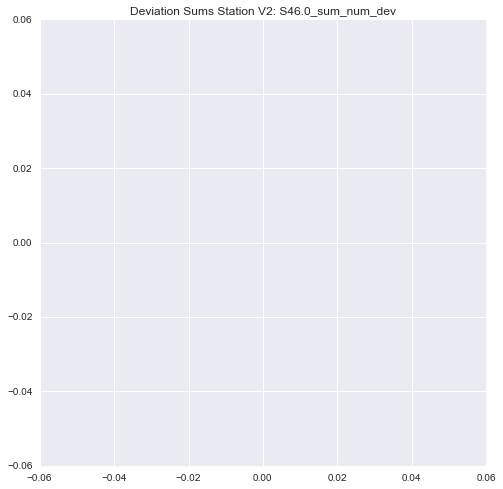

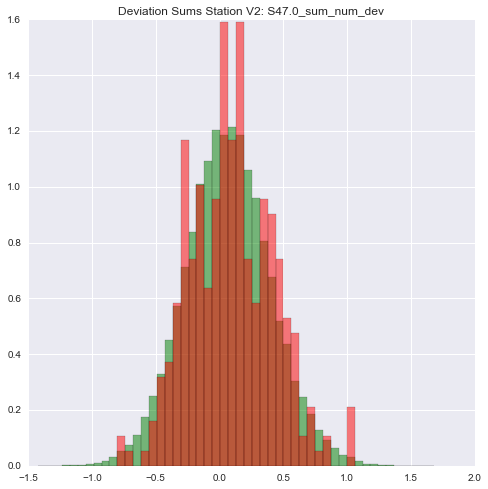

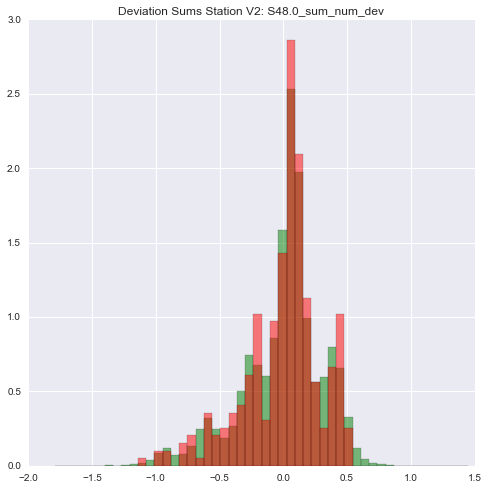

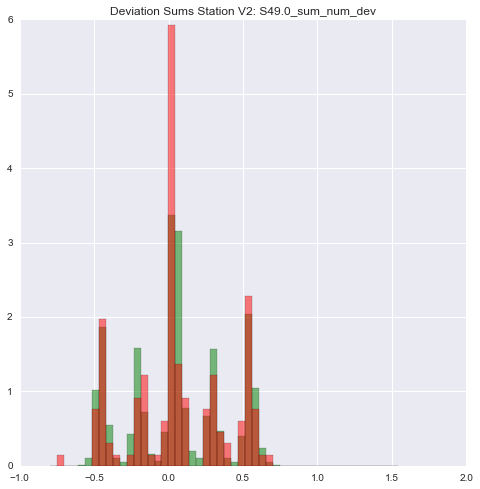

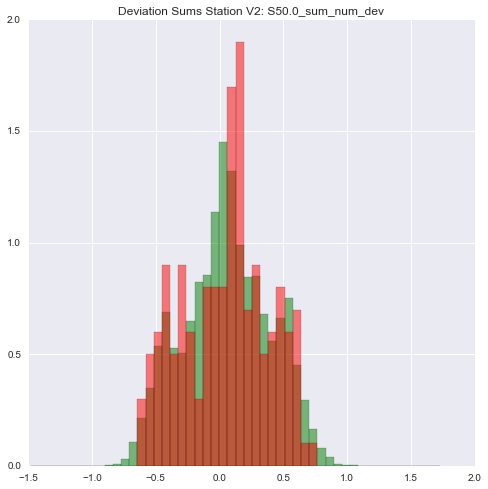

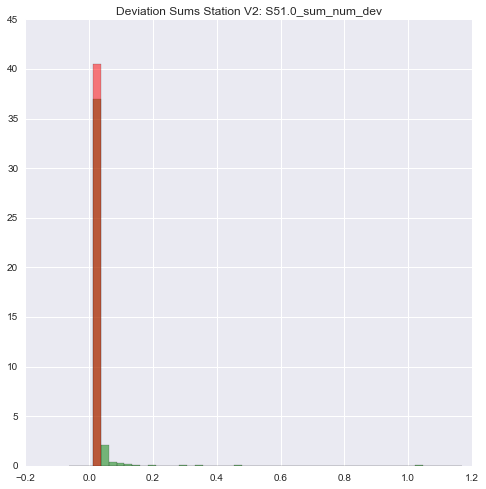

In [168]:
data0 = feat_num_sum[feat_num_sum['R']==0]
data1 = feat_num_sum[feat_num_sum['R']==1]


n_bins = 50

for i, station_V2 in enumerate(station_cols):
    
    plt.figure(figsize=(8,8))

    
    ran = [feat_num_sum[station_V2].min(), feat_num_sum[station_V2].max()]
    #ran = [-0.1, 0.1]
    width = float((ran[1] - ran[0]))/n_bins
    
    freq0, bins = np.histogram(data0[station_V2].values, bins=n_bins, density=True, range=ran)
    freq1, bins = np.histogram(data1[station_V2].values, bins=n_bins, density=True, range=ran)
    
    plt.bar(bins[1:], freq0, alpha=0.5, color='g', width=width)
    plt.bar(bins[1:], freq1, alpha=0.5, color='r', width=width)
    
    plt.title('Deviation Sums Station V2: {}'.format(station_V2))
    plt.show()

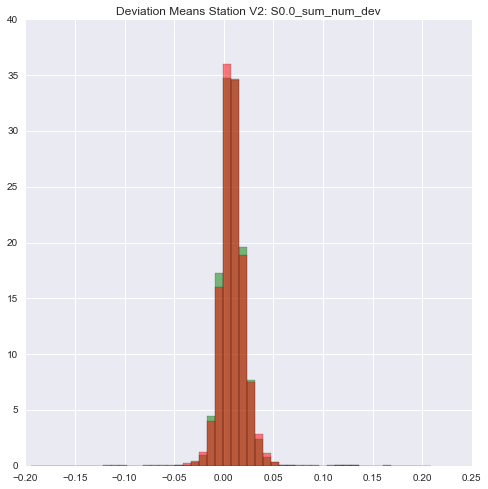

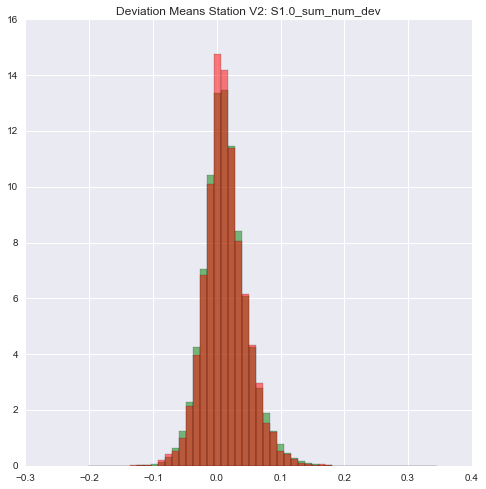

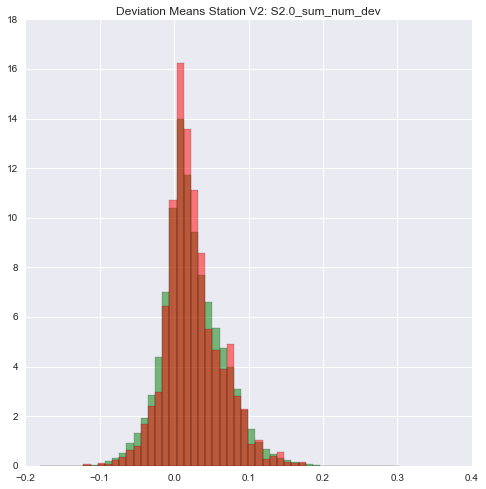

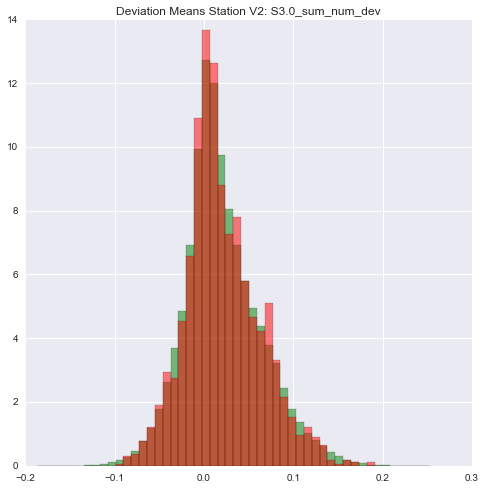

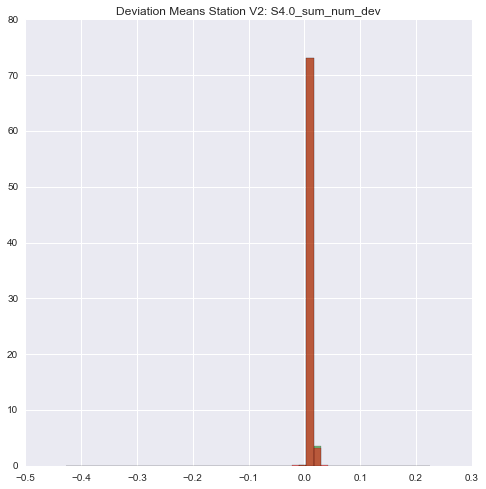

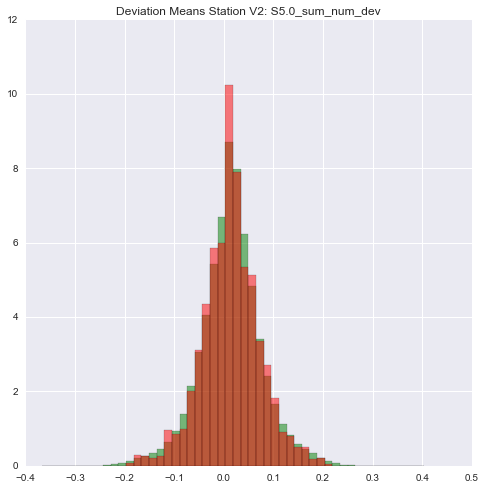

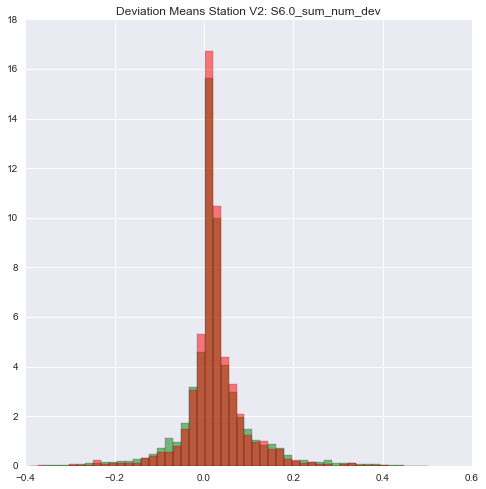

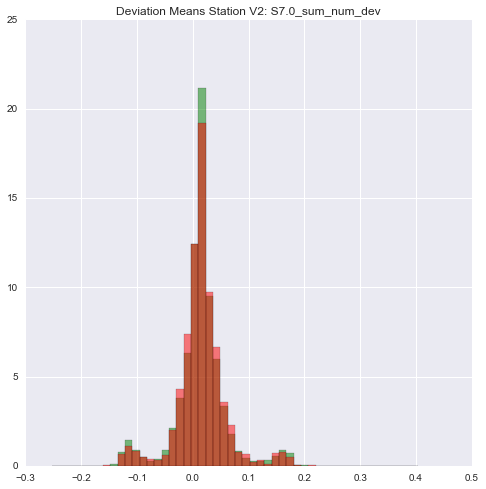

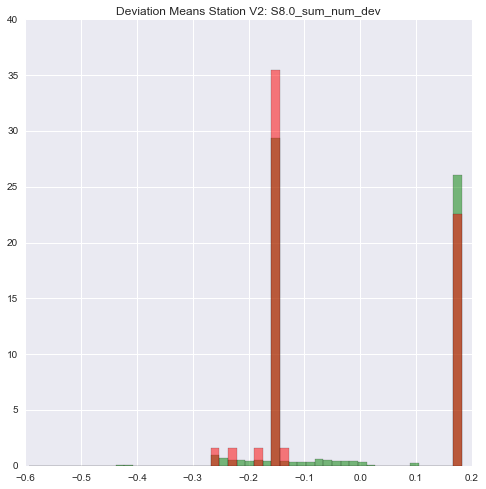

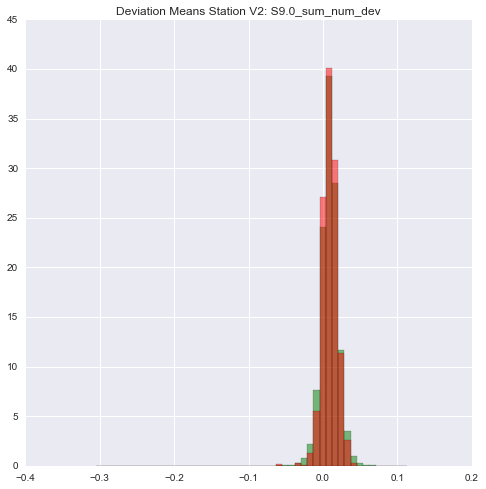

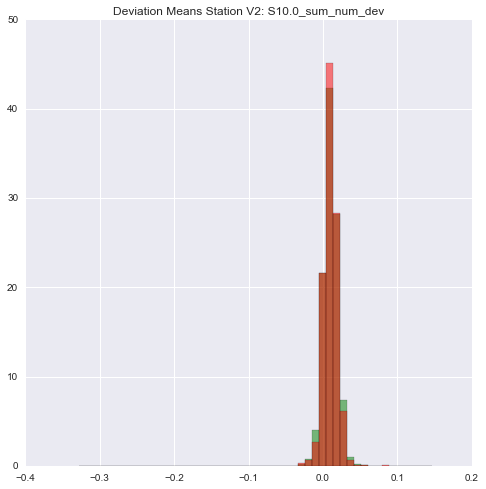

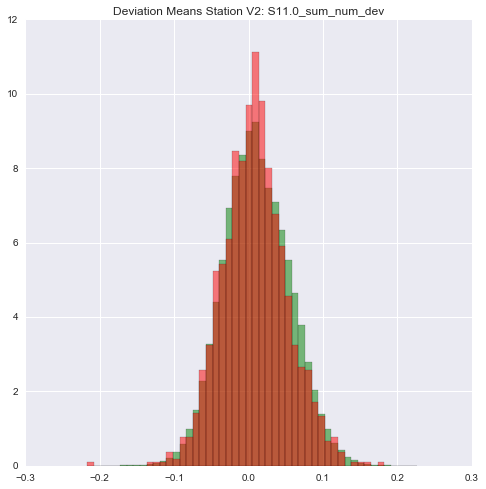

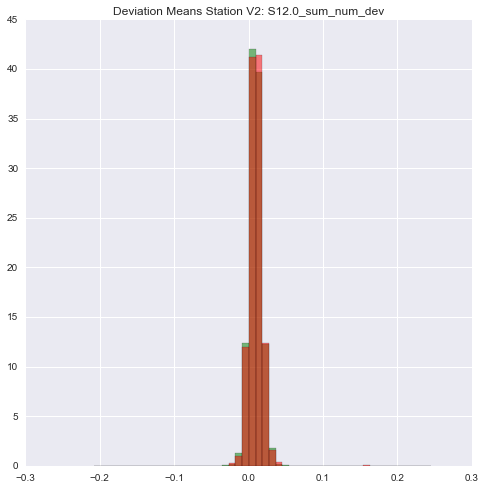

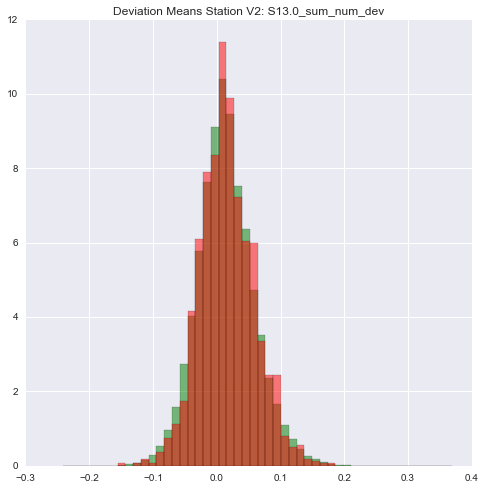

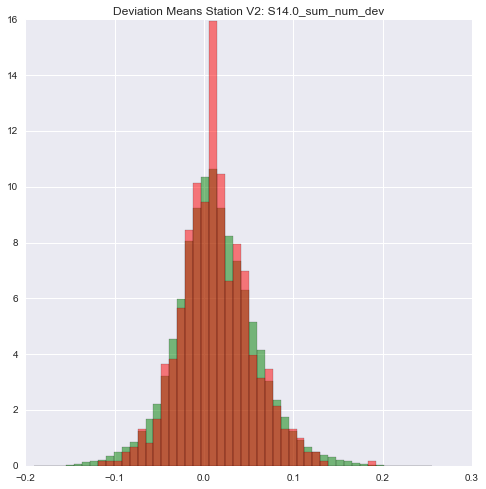

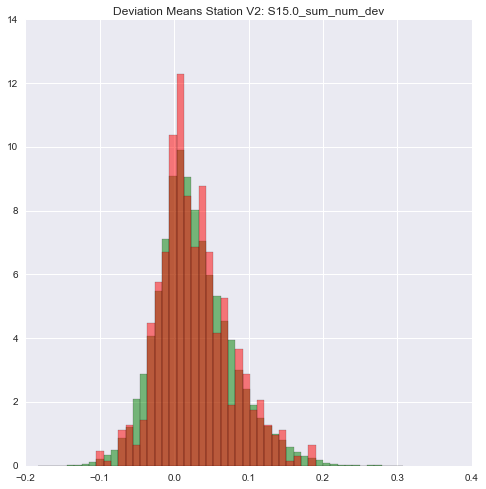

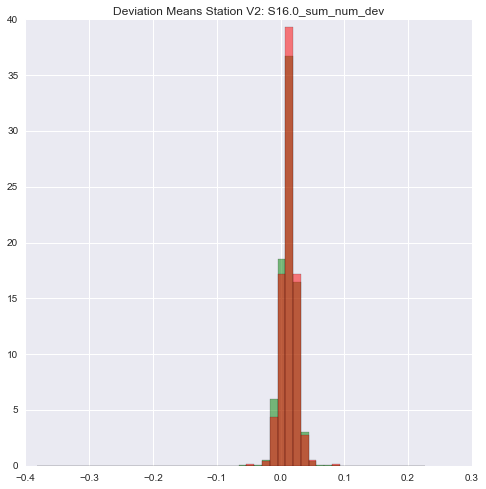

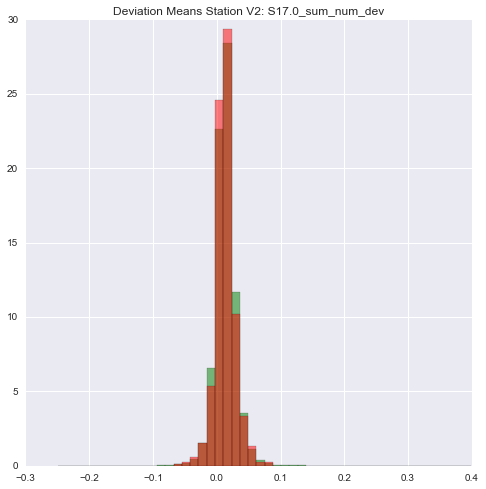

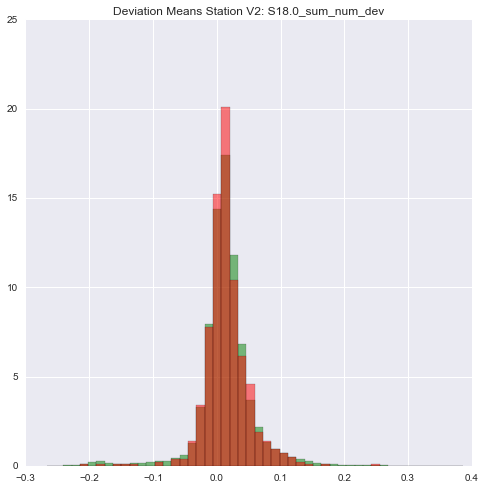

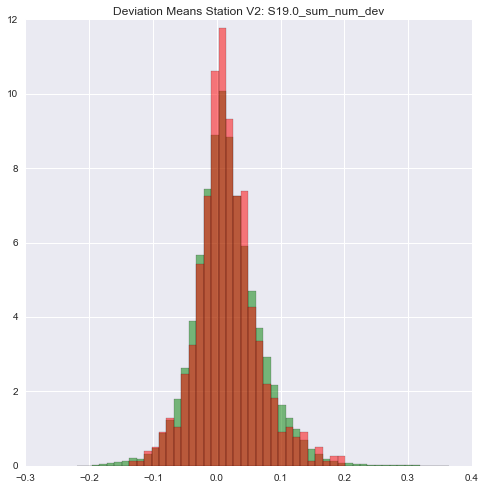

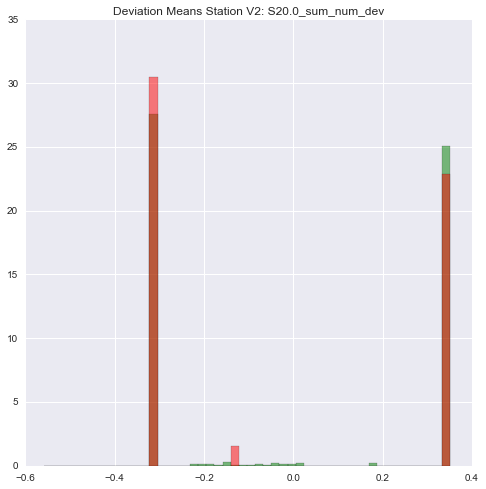

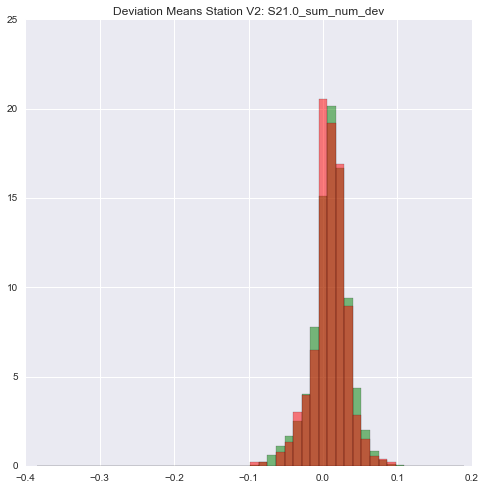

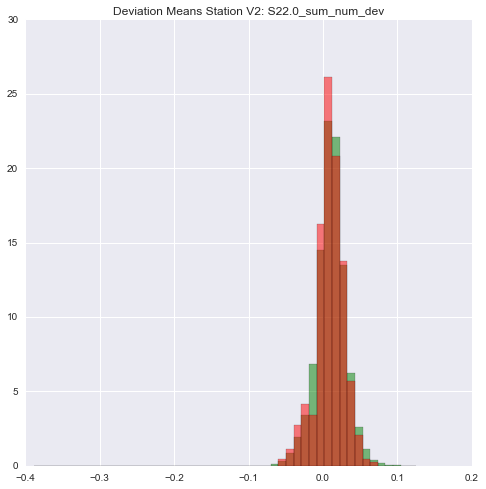

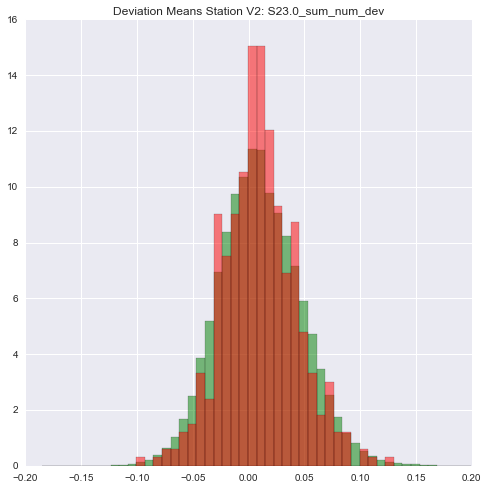

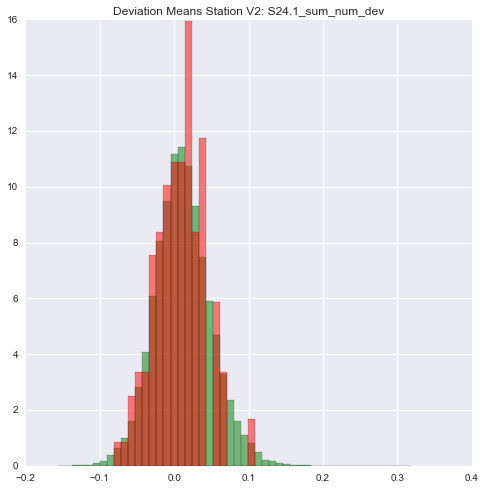

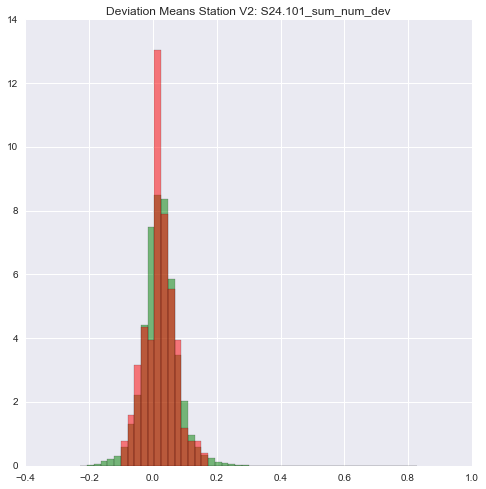

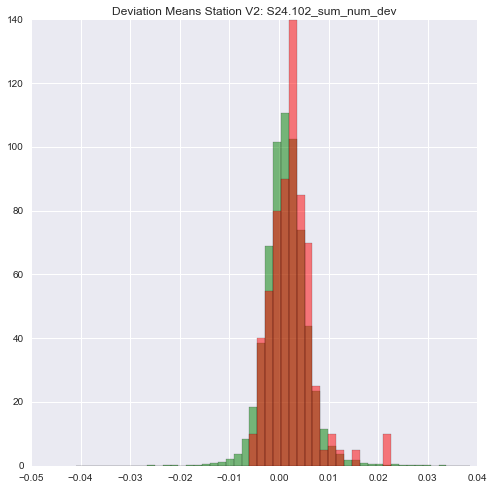

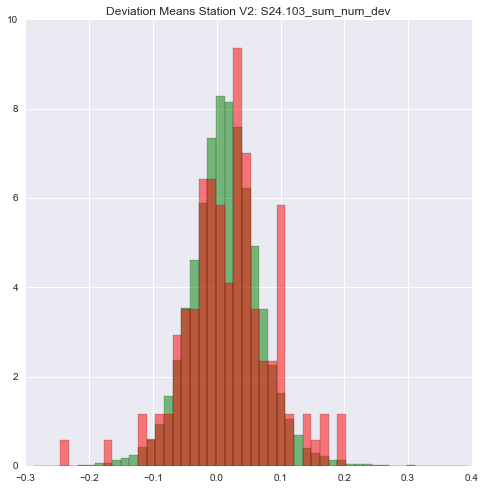

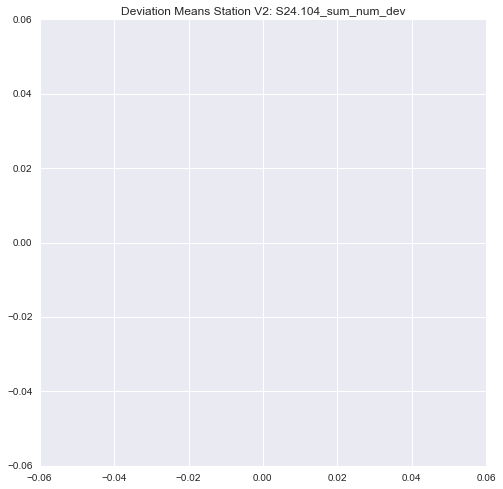

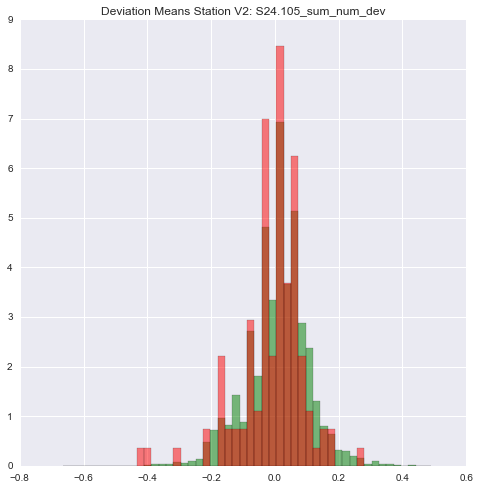

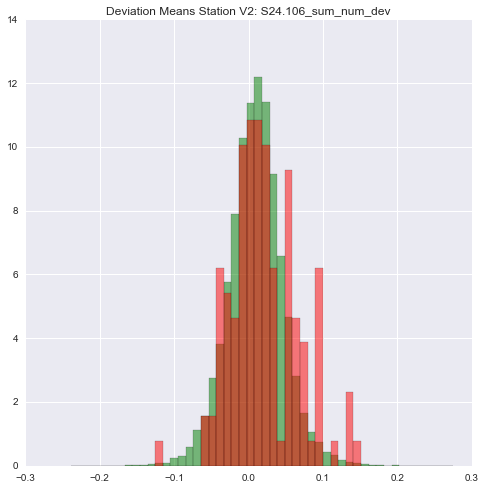

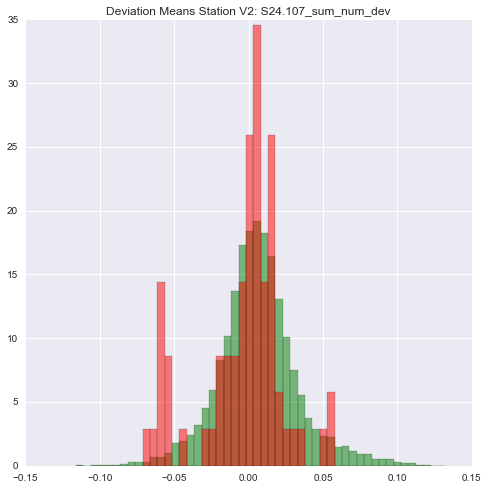

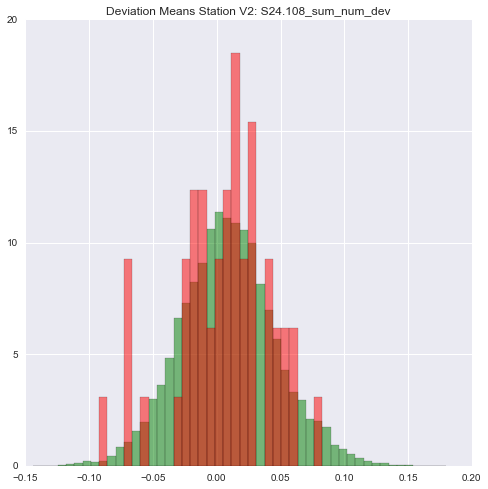

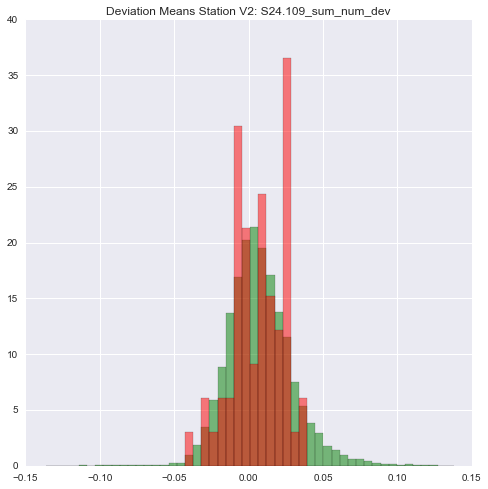

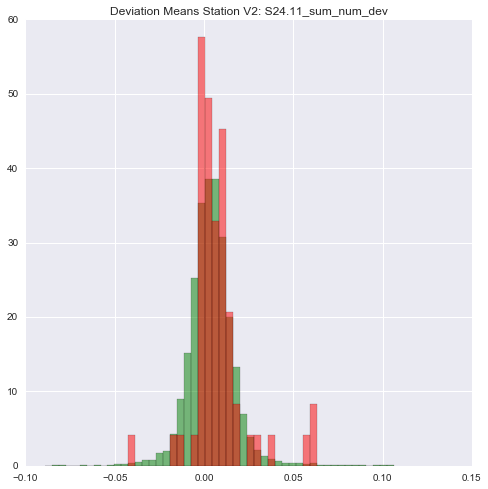

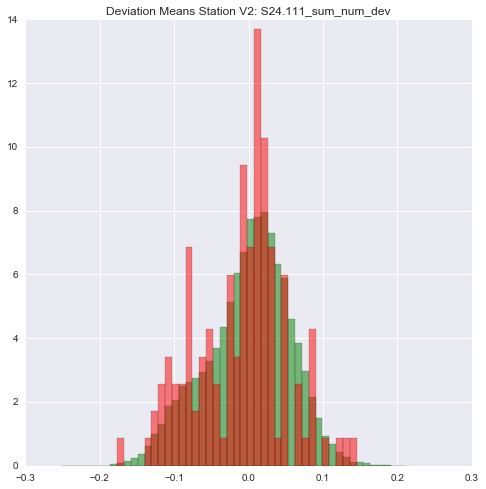

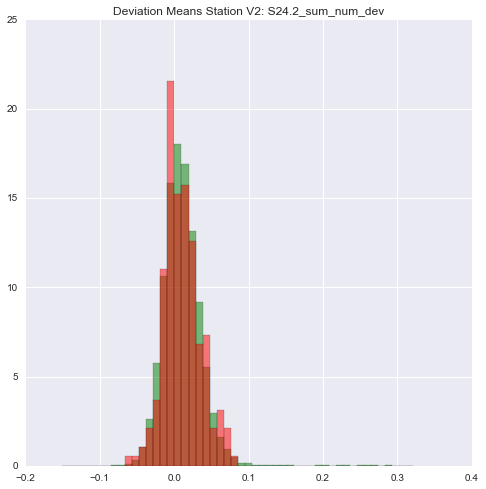

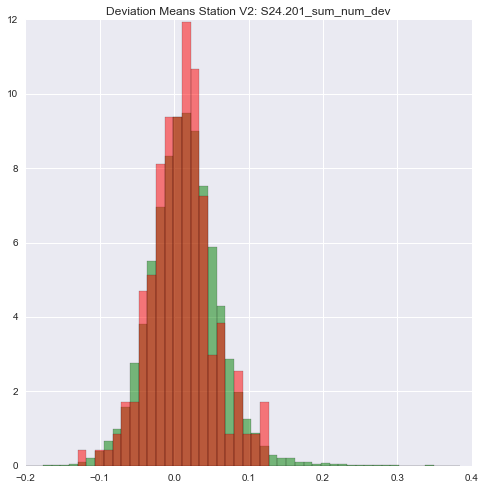

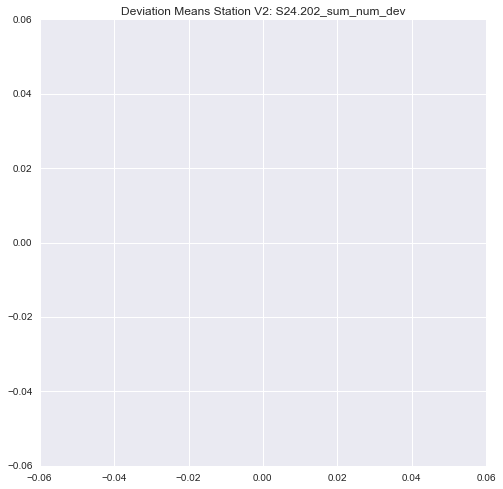

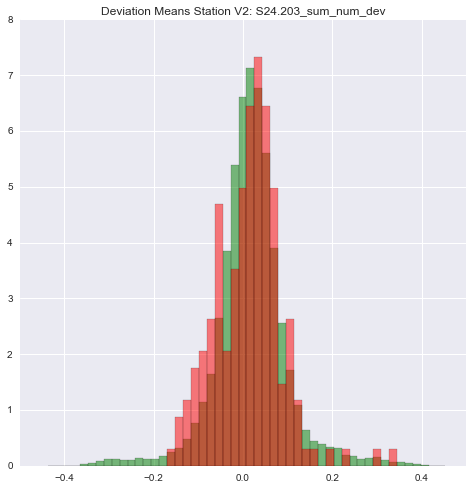

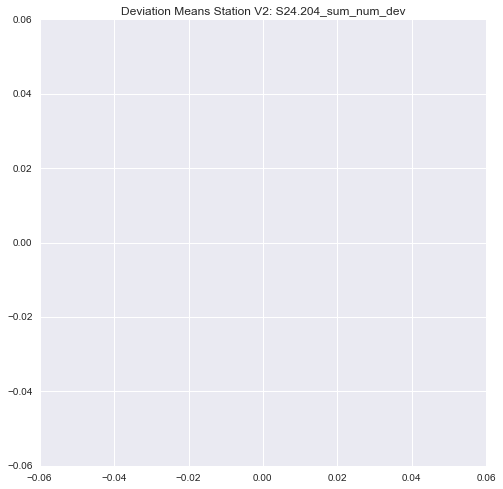

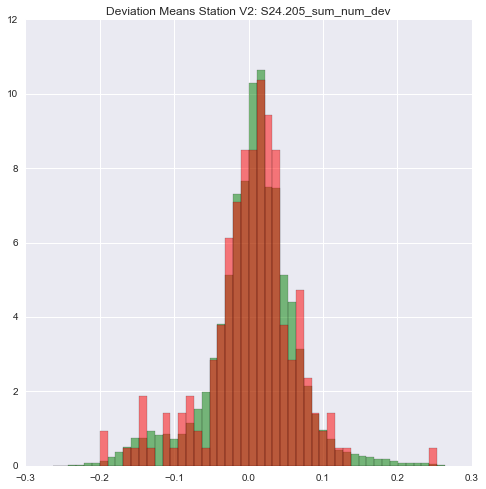

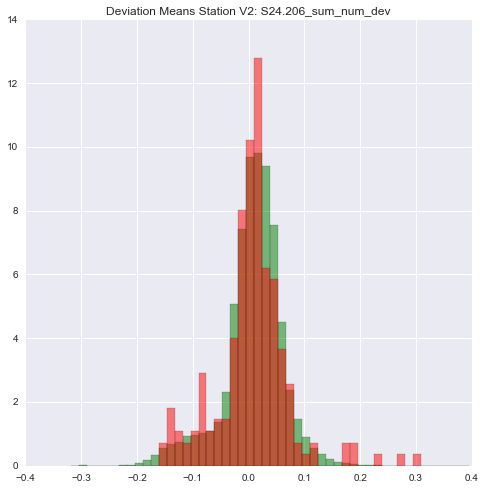

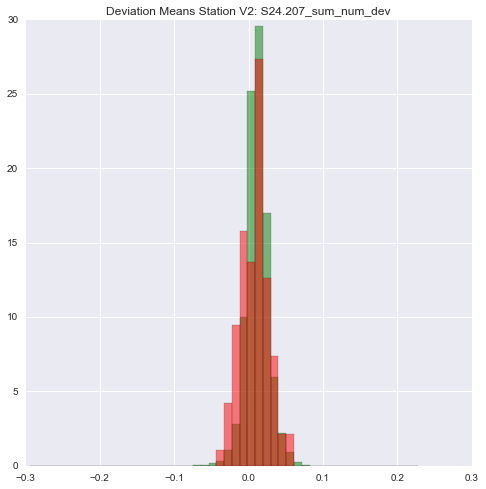

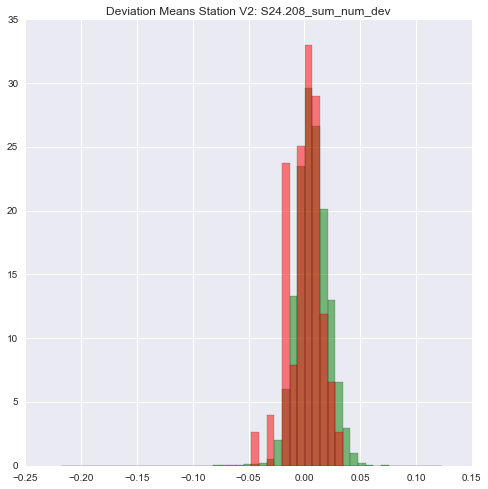

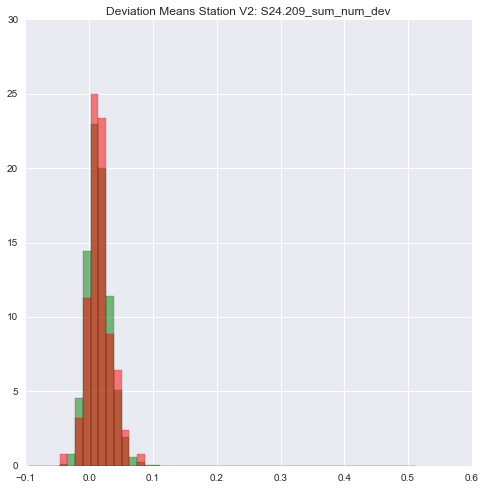

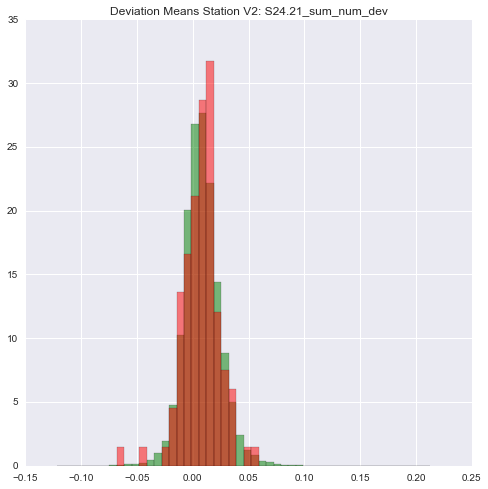

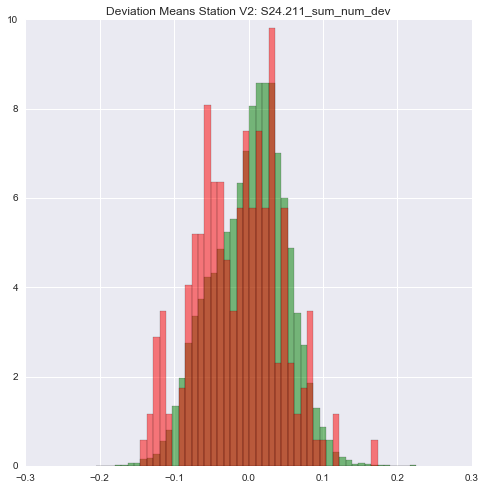

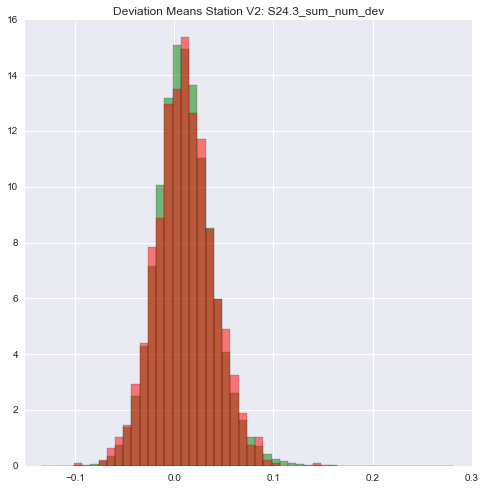

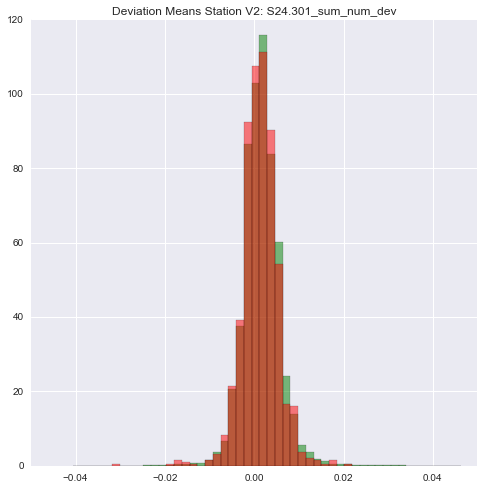

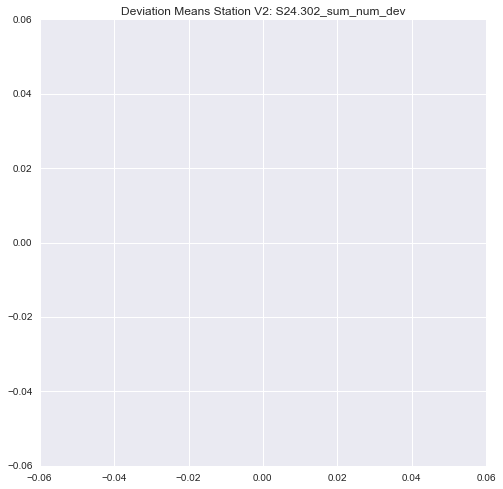

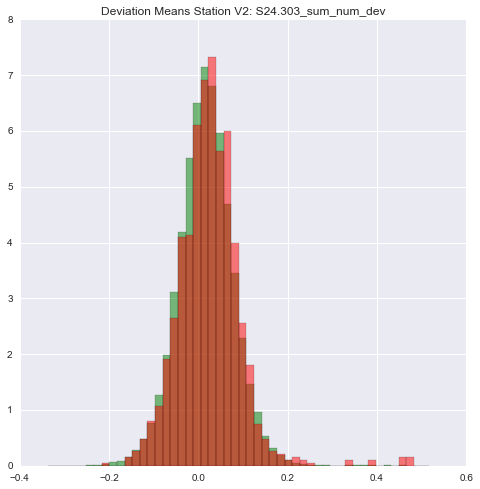

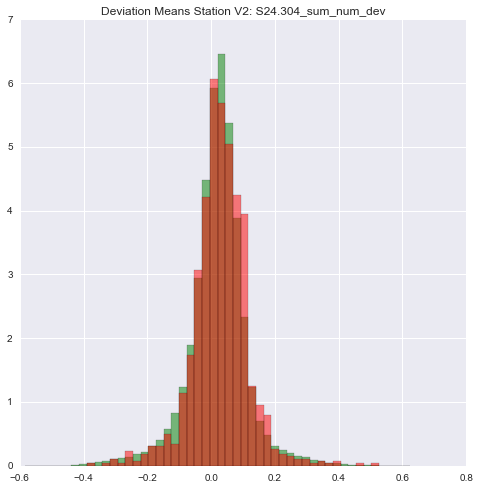

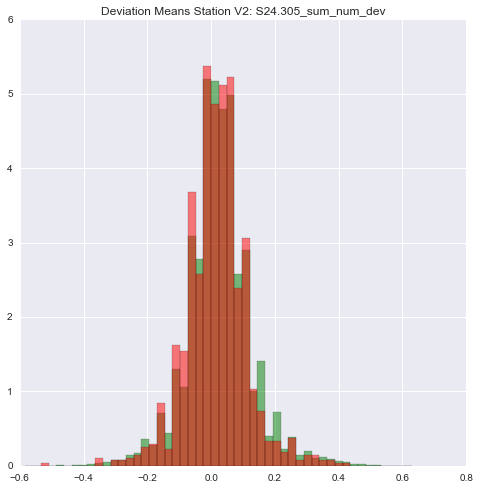

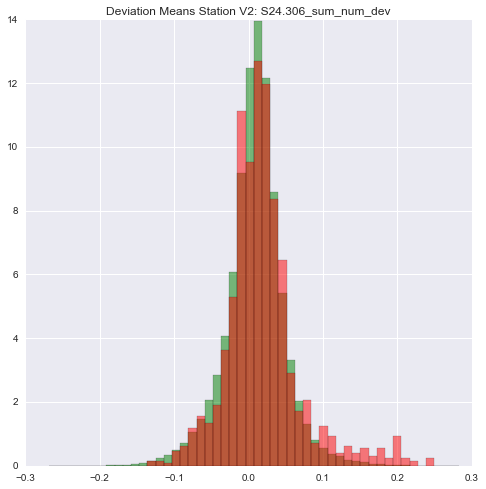

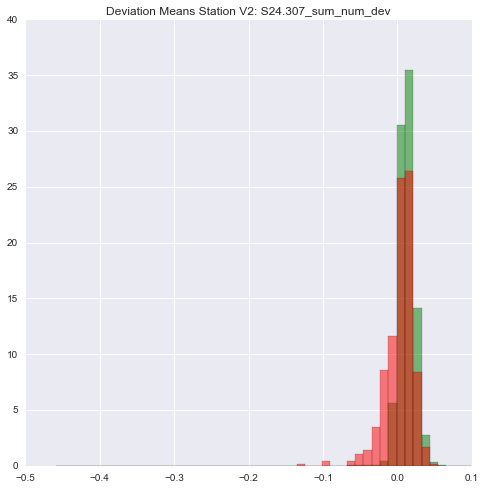

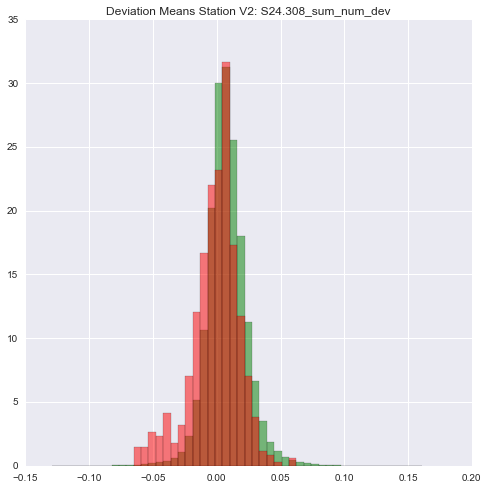

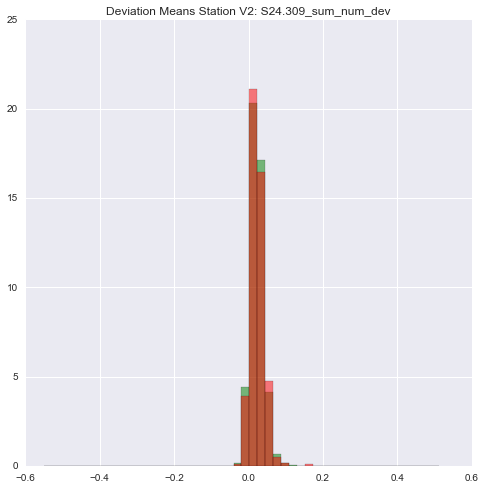

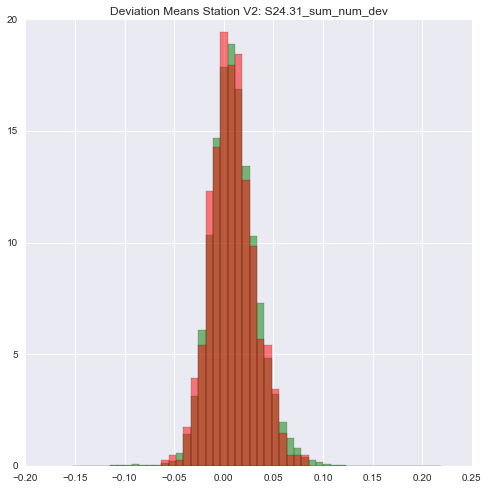

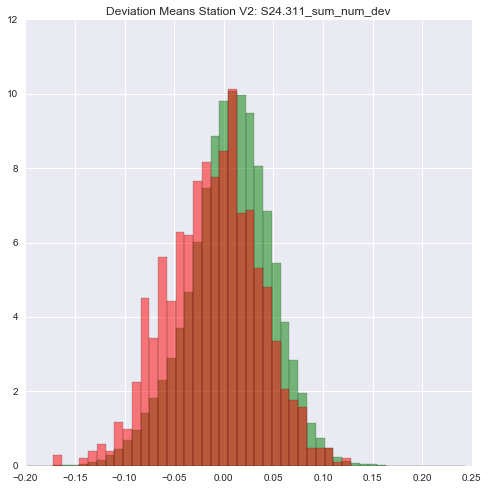

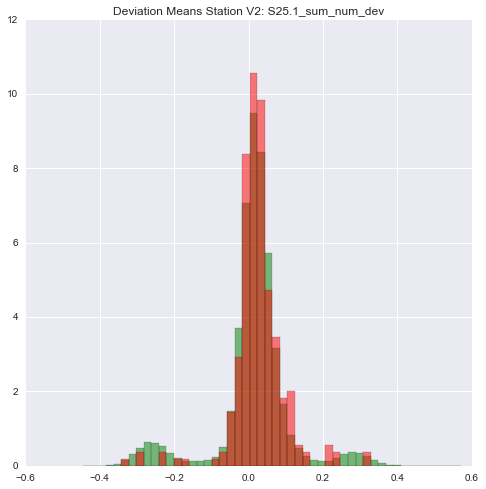

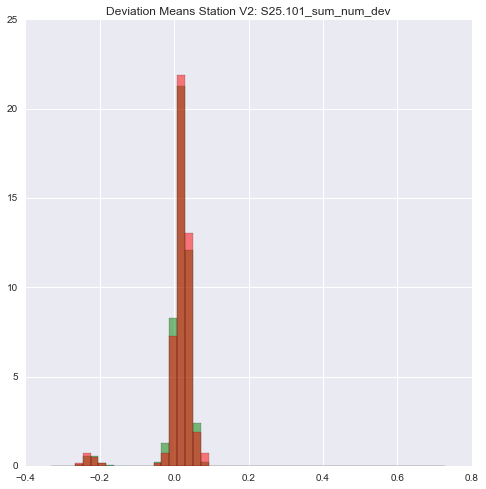

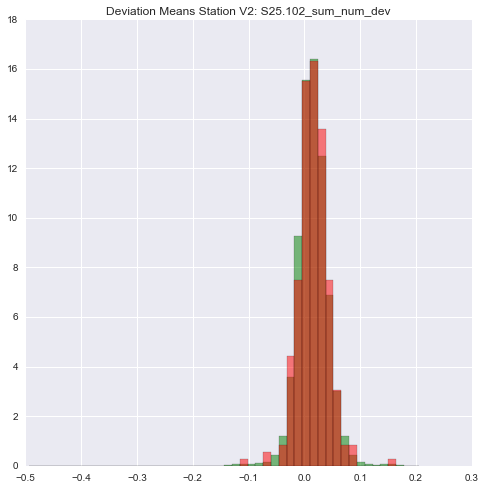

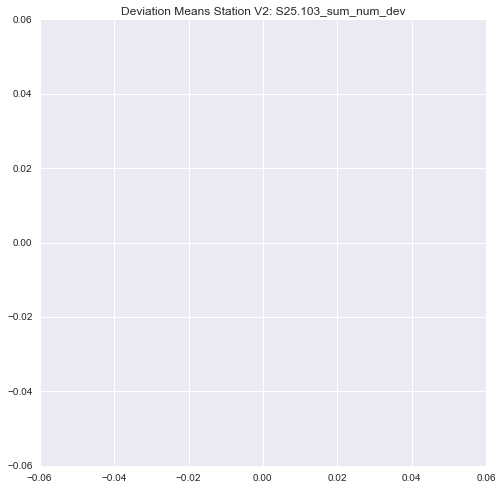

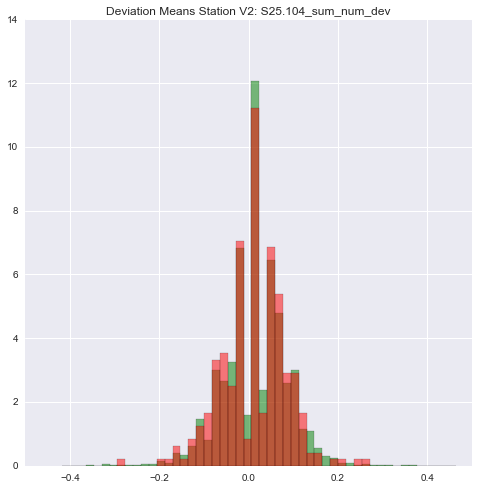

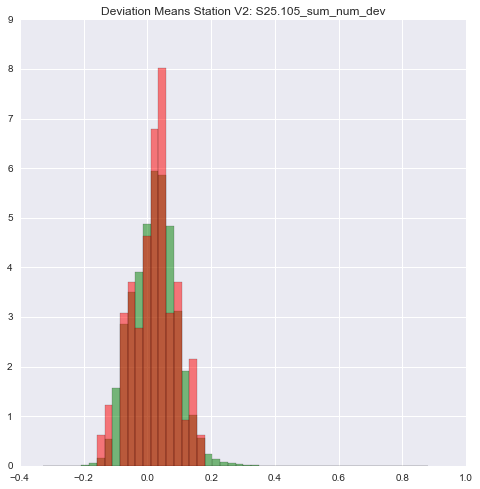

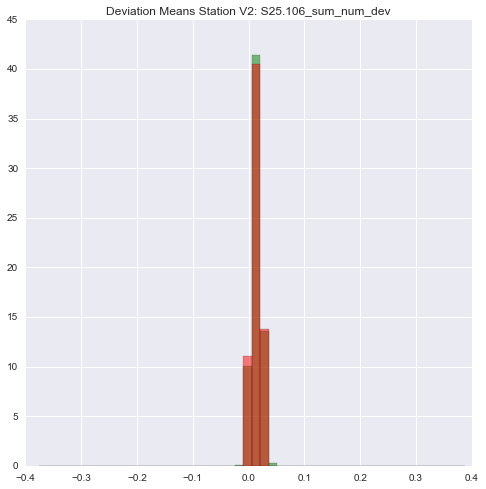

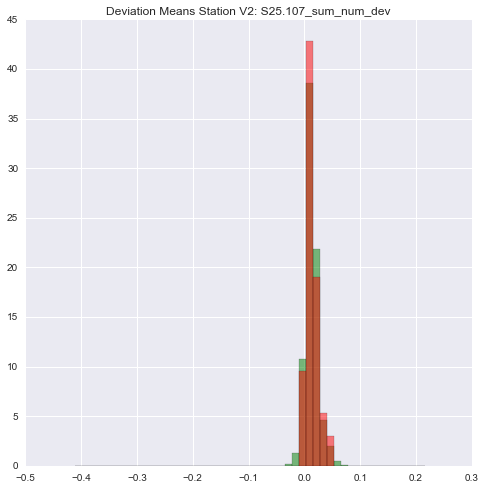

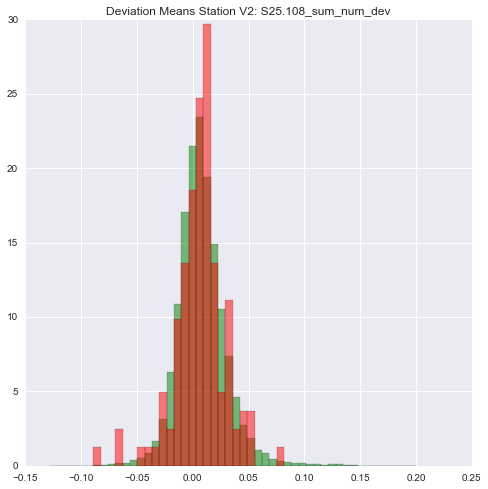

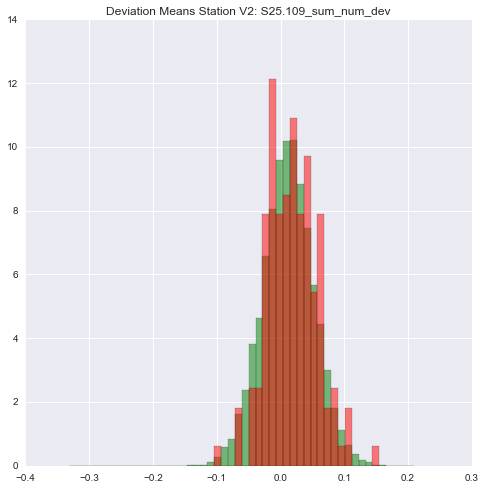

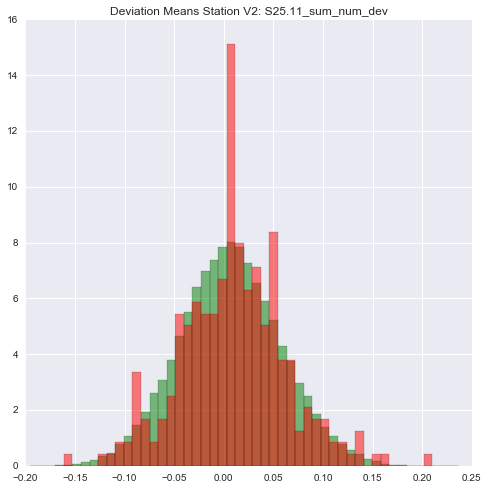

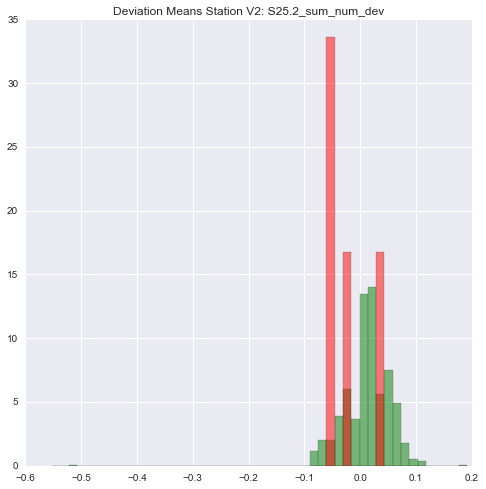

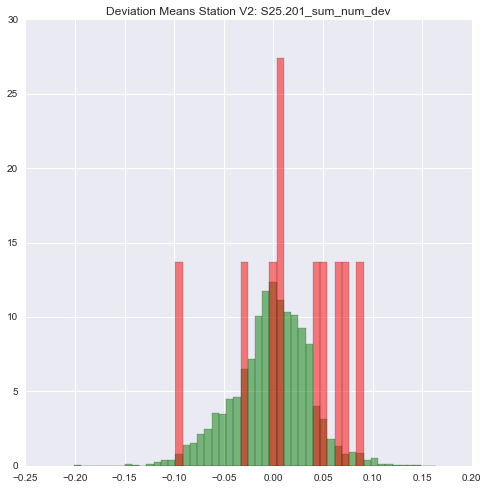

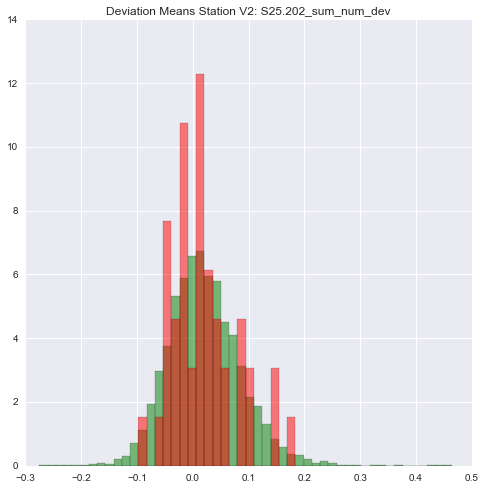

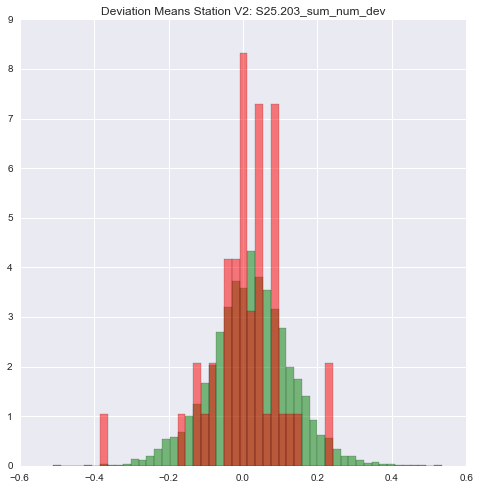

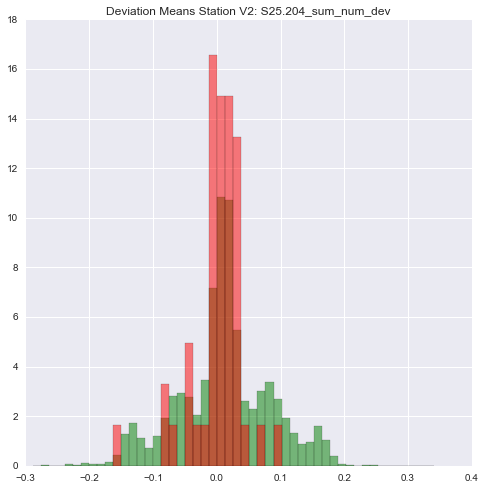

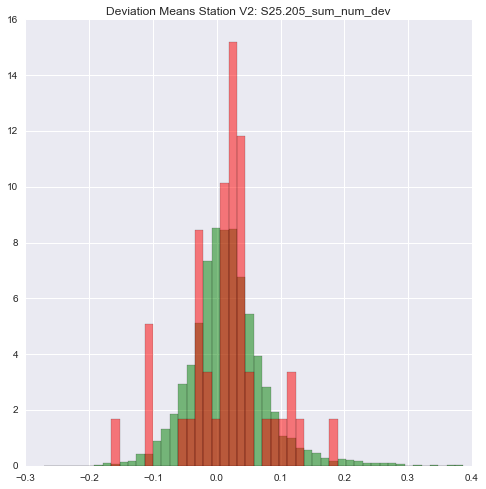

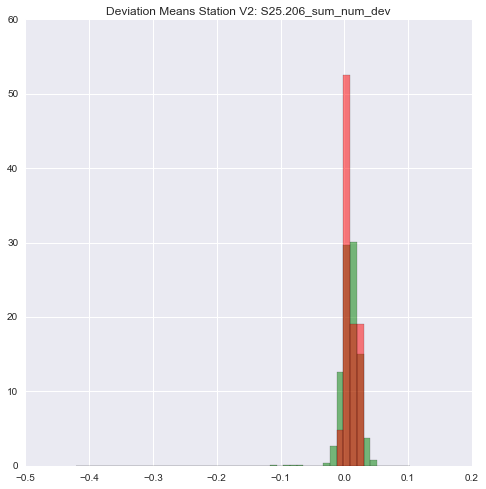

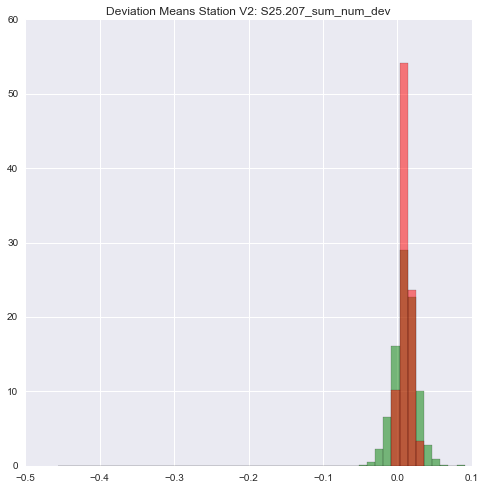

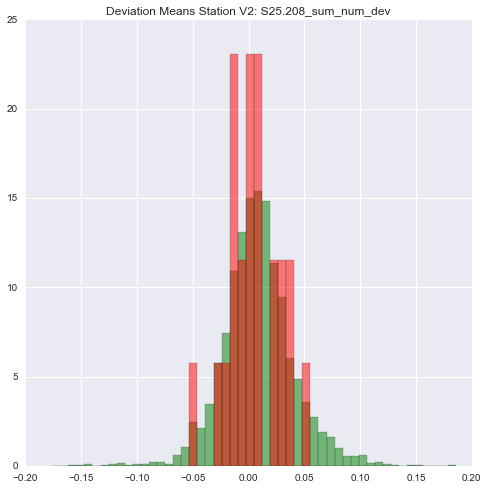

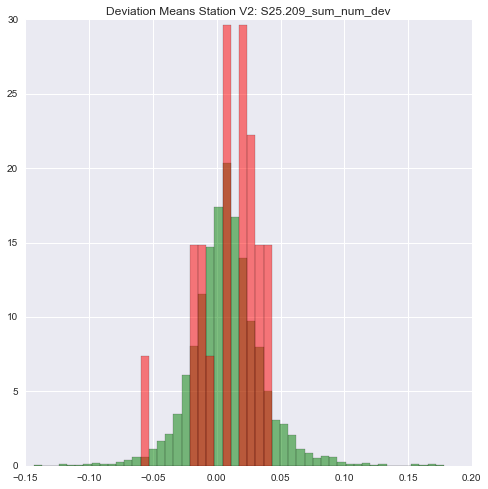

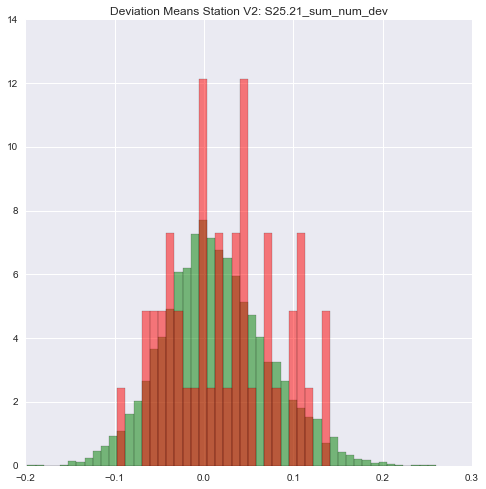

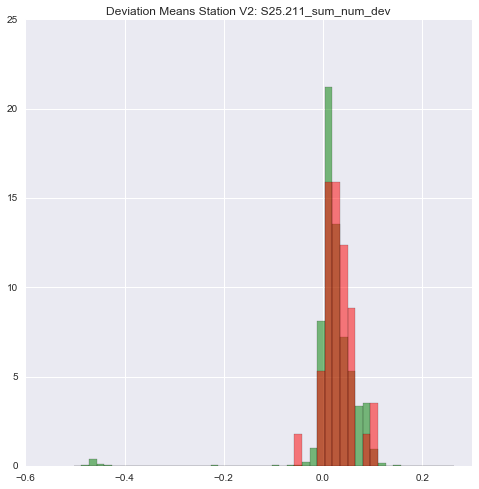

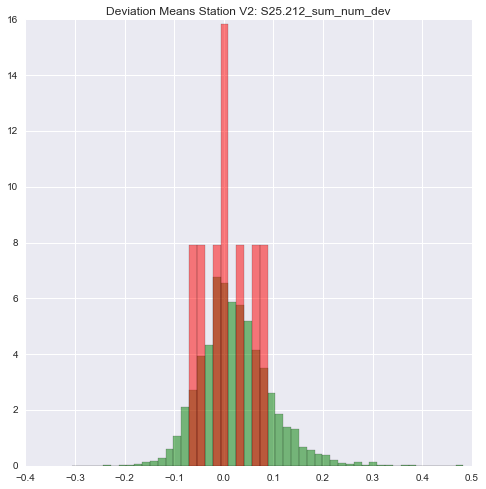

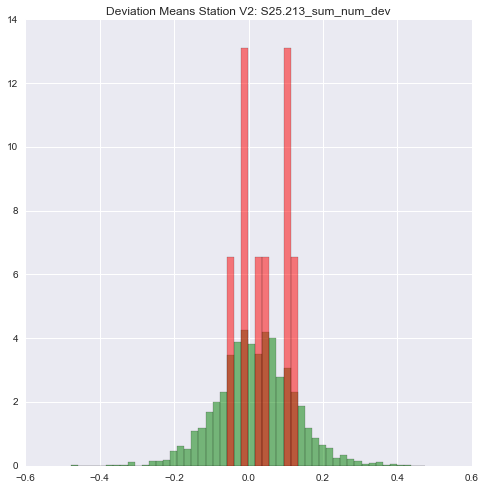

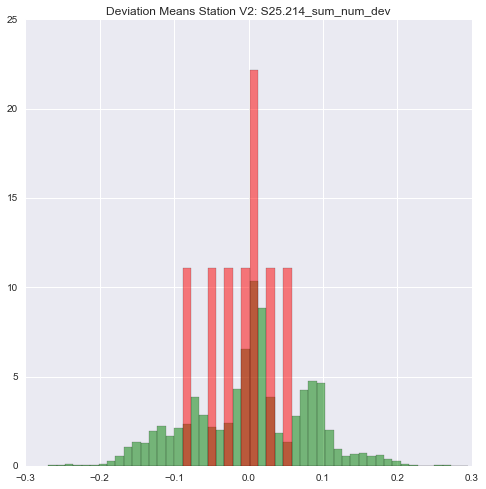

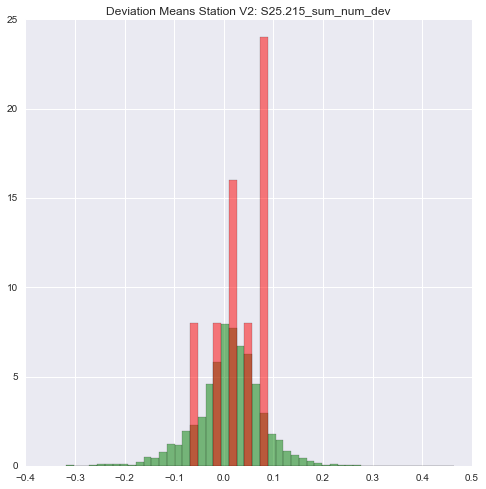

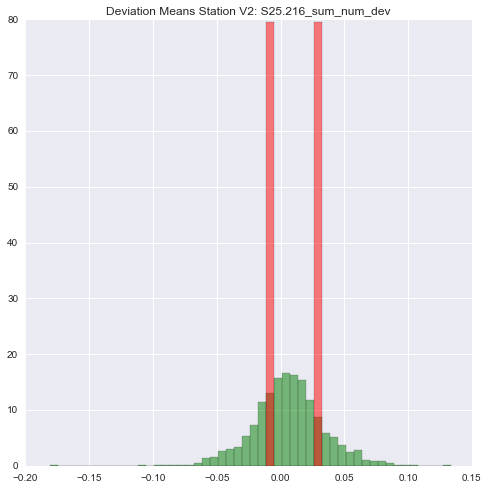

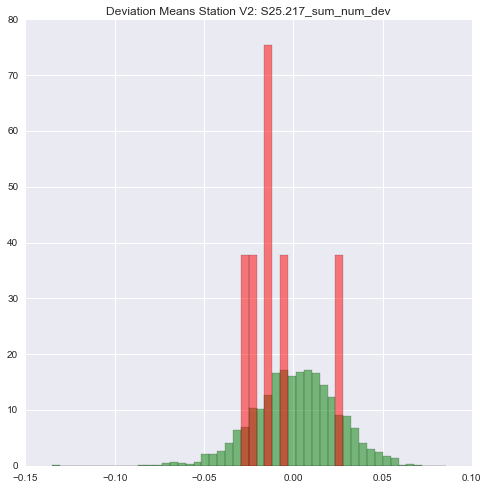

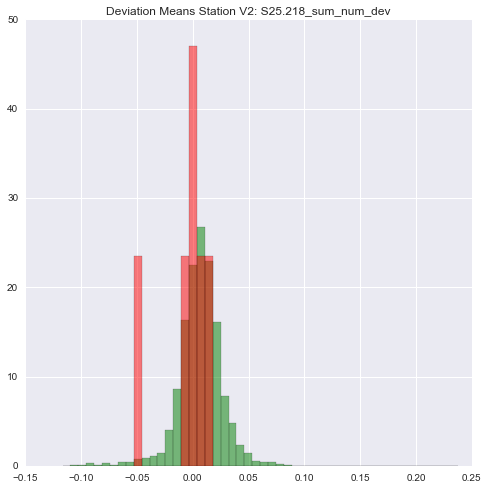

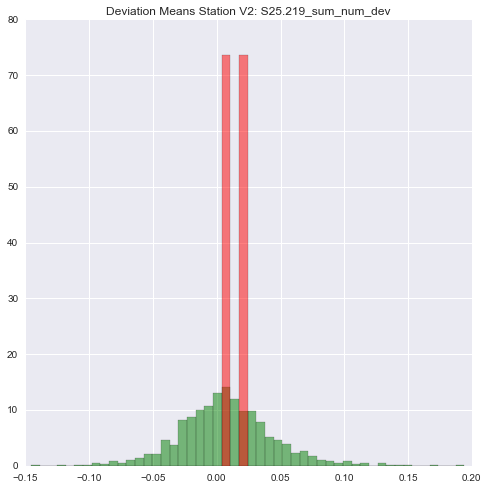

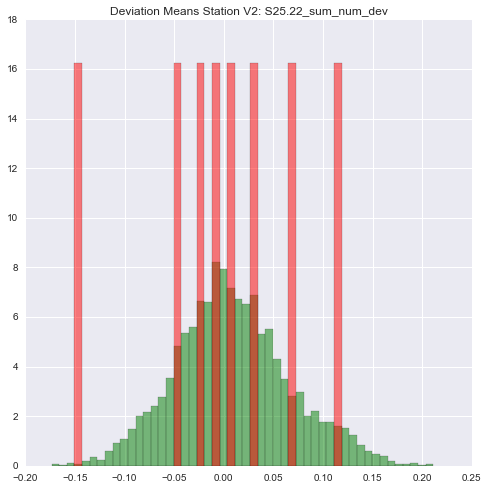

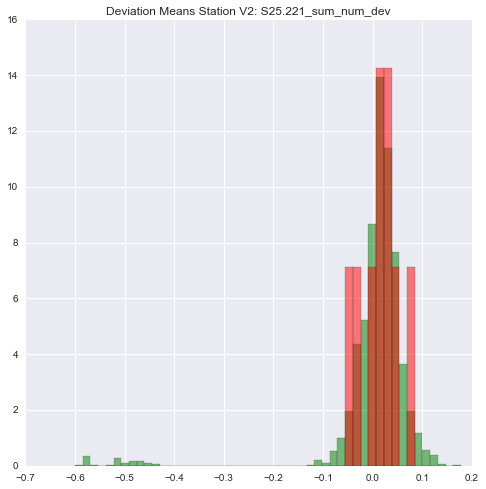

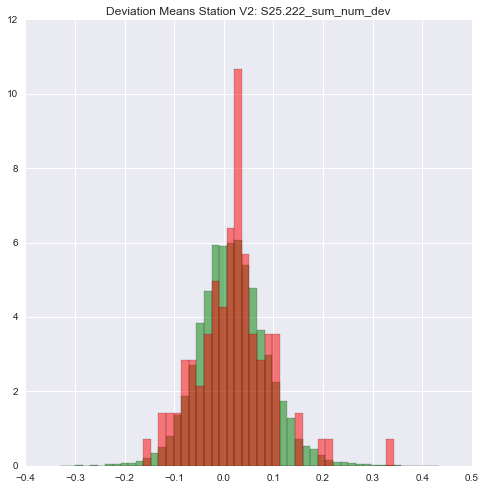

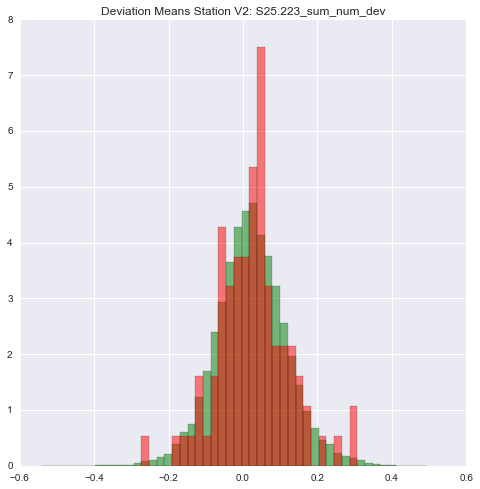

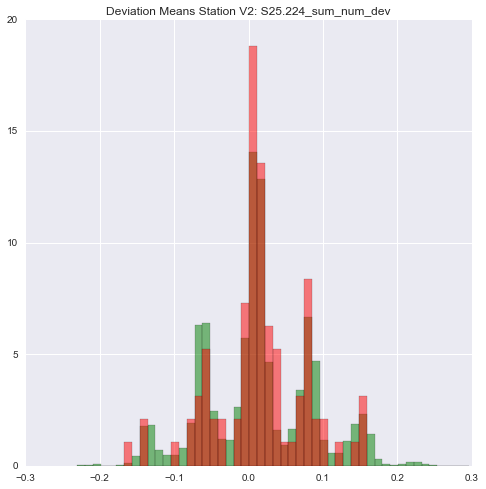

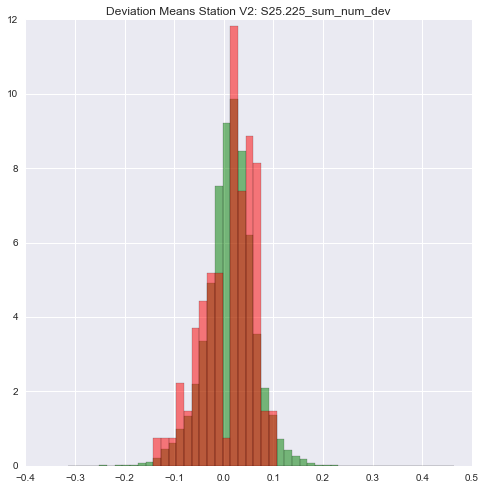

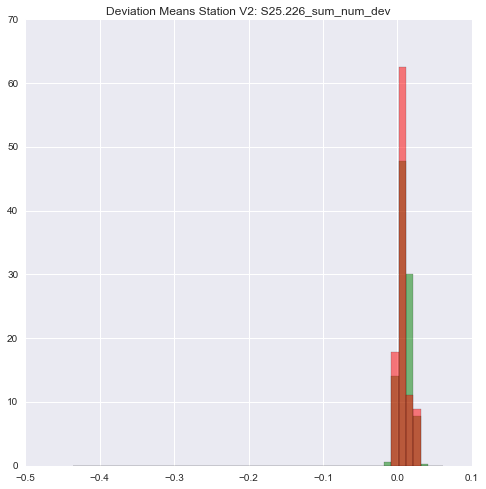

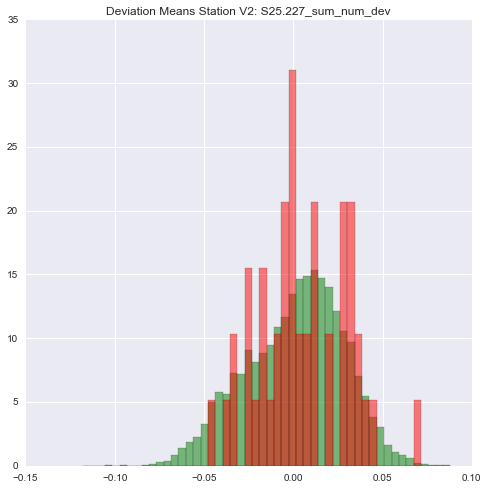

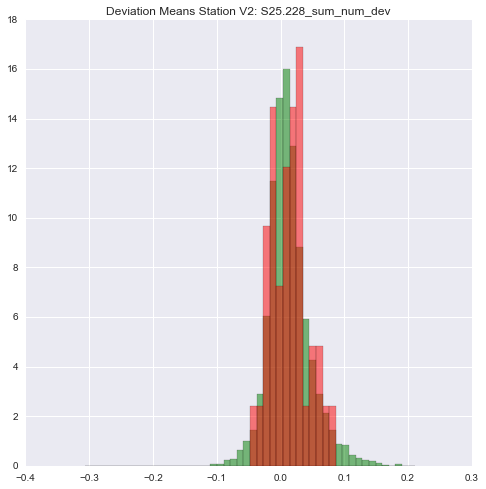

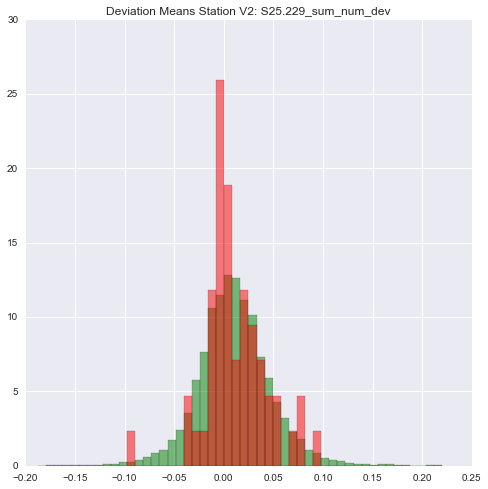

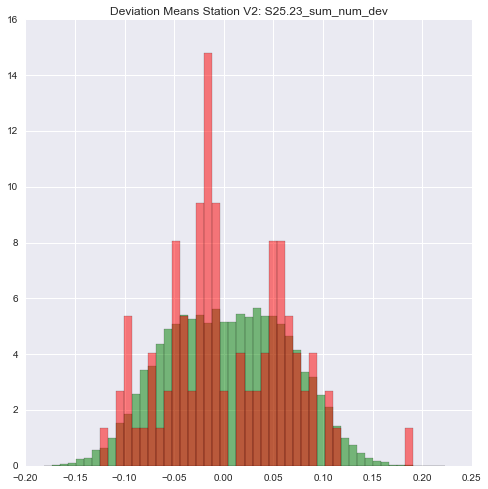

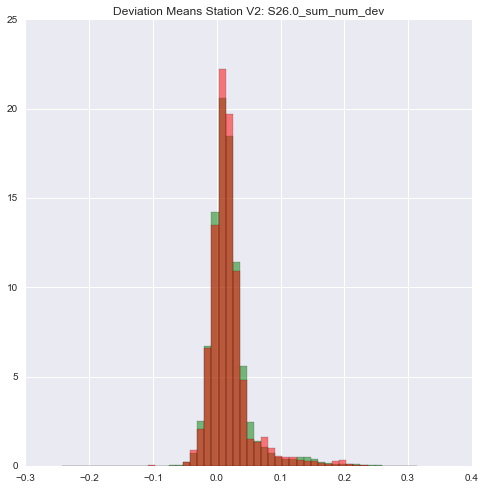

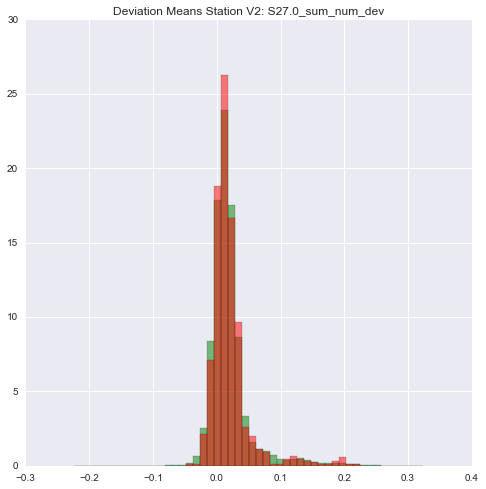

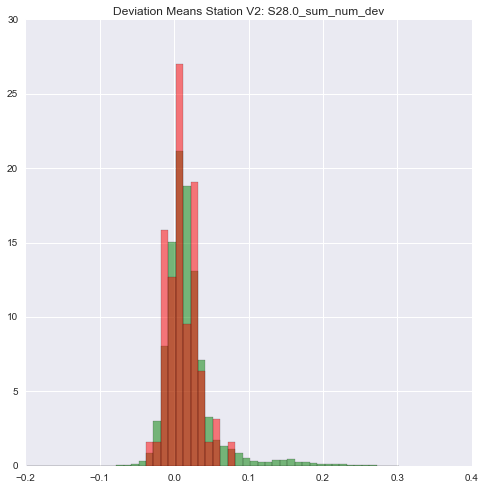

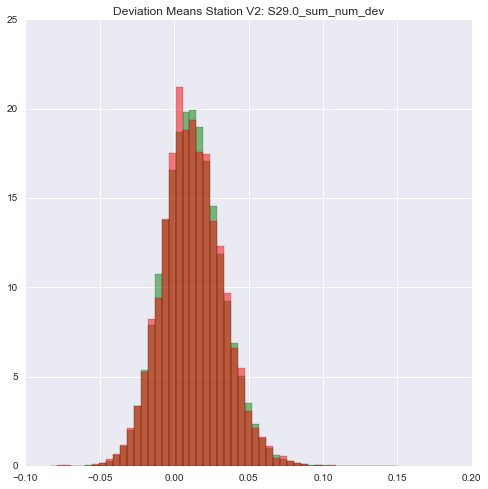

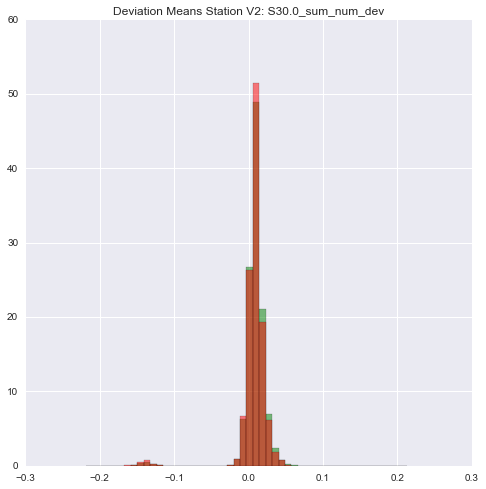

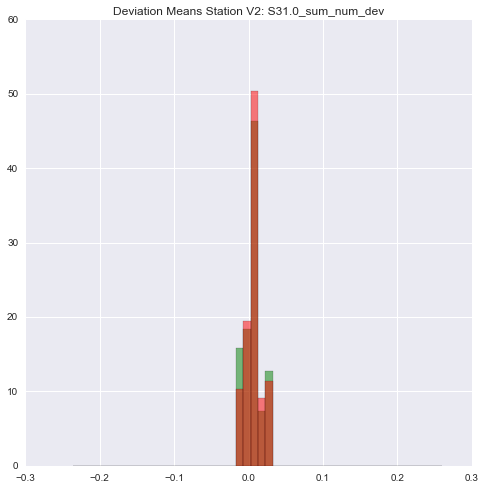

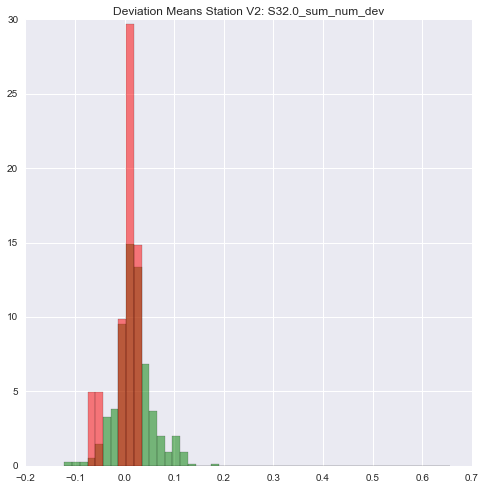

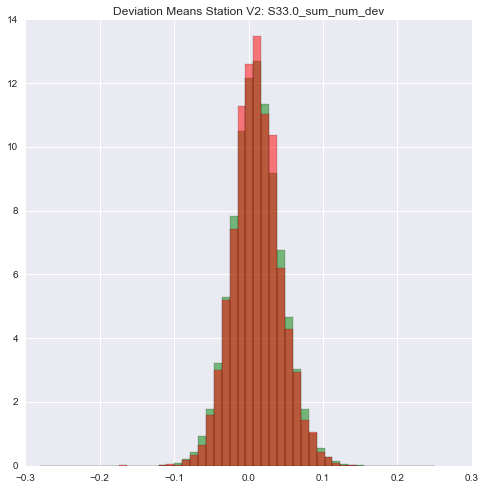

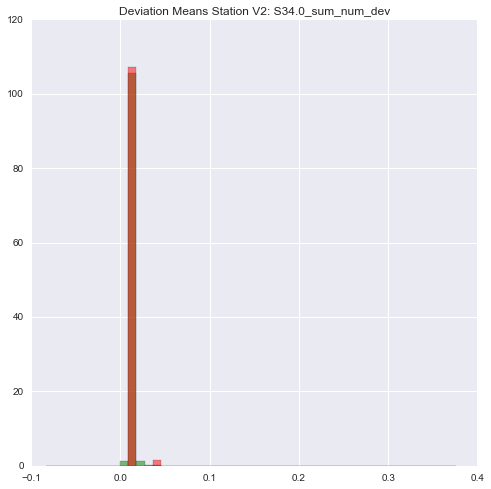

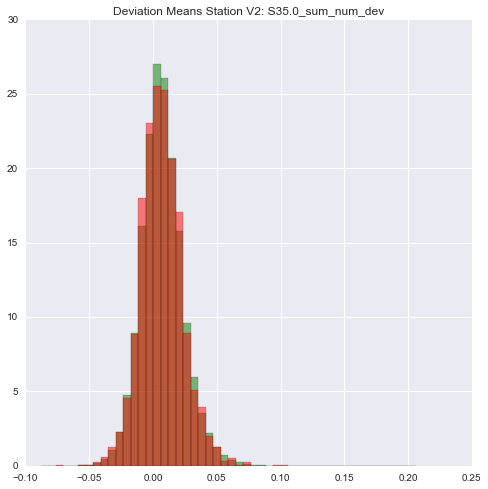

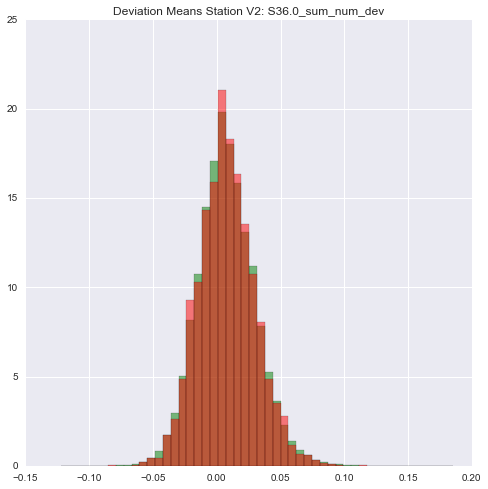

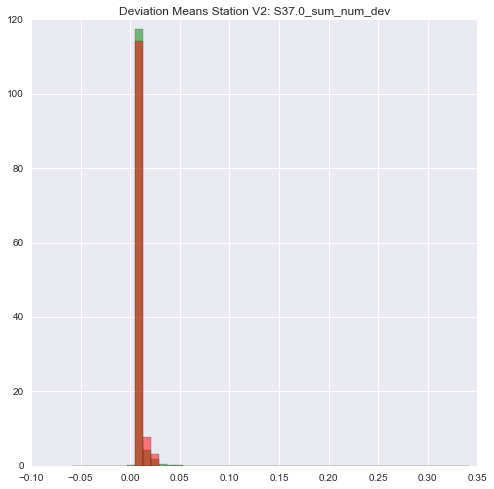

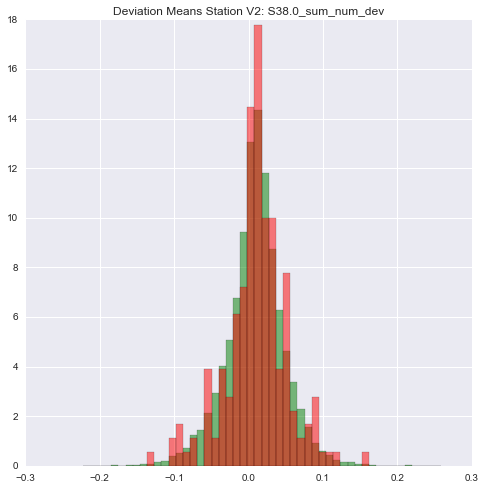

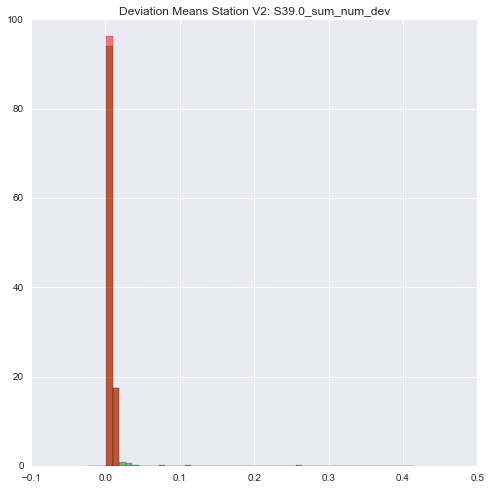

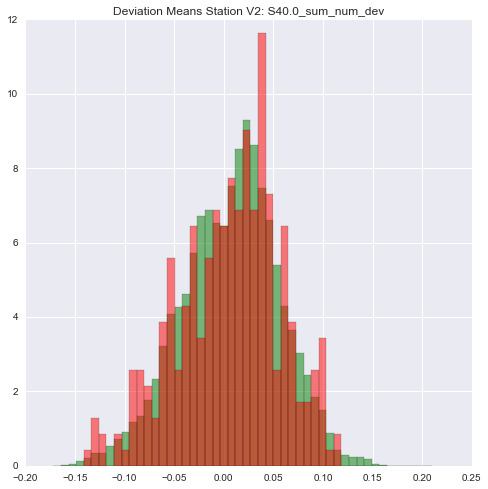

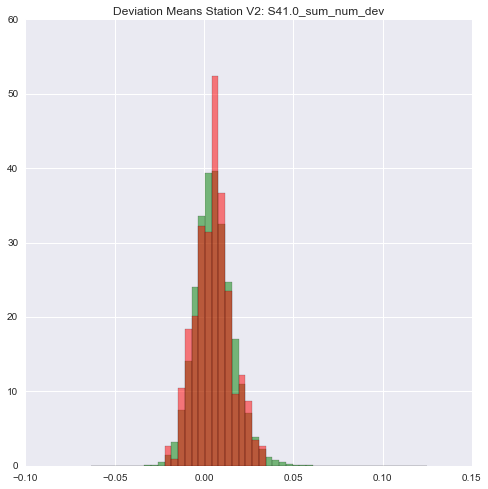

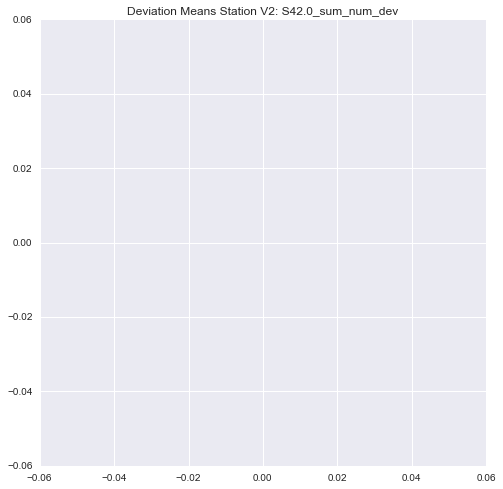

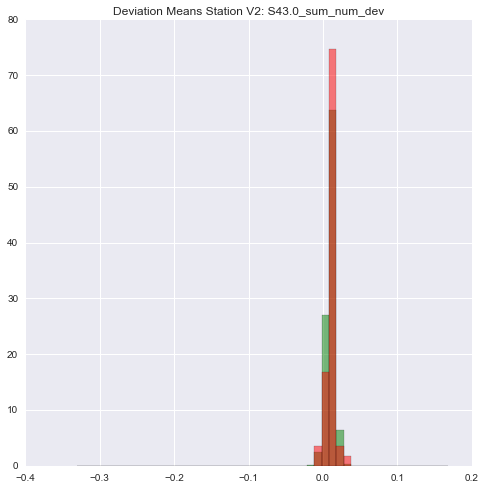

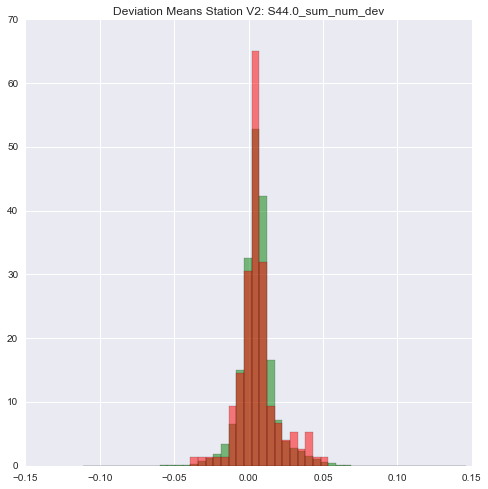

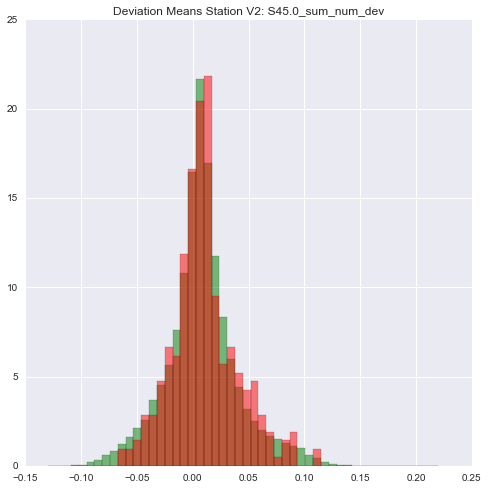

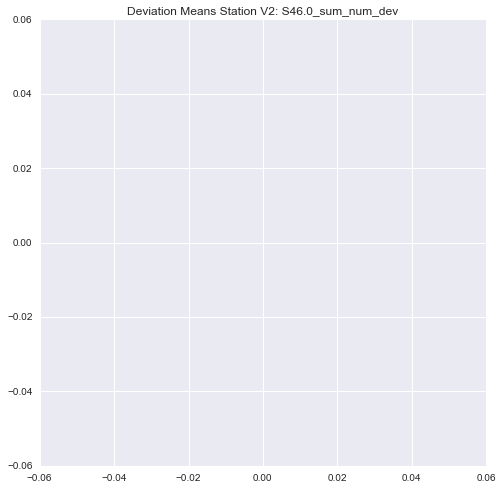

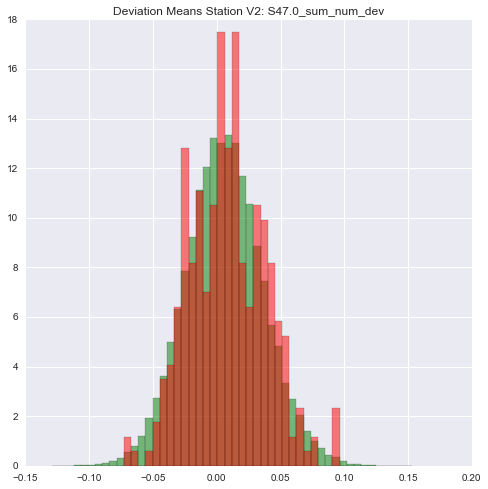

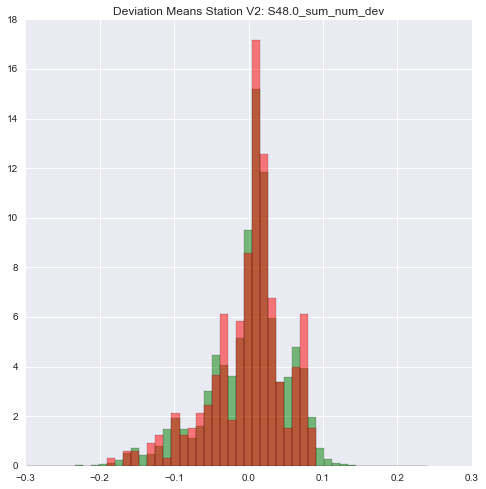

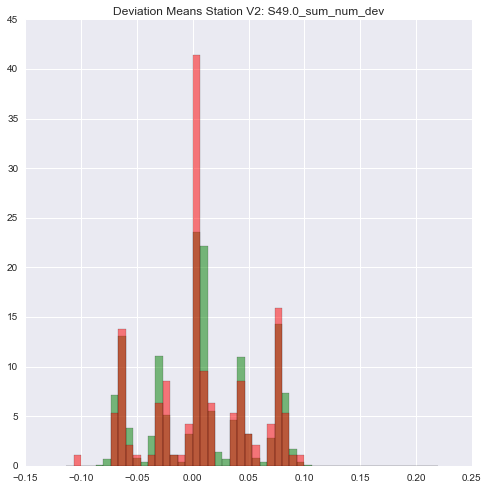

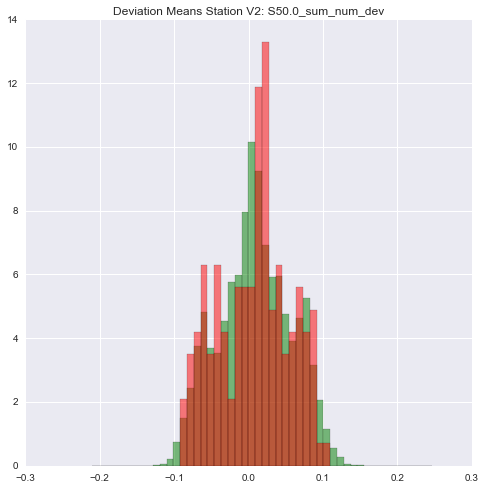

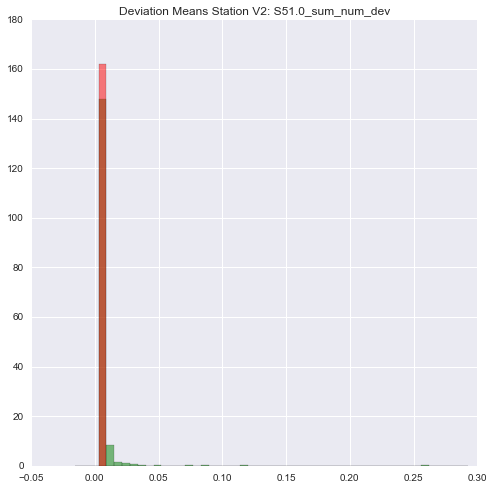

In [169]:
data0 = feat_num_mean[feat_num_mean['R']==0]
data1 = feat_num_mean[feat_num_mean['R']==1]


n_bins = 50

for i, station_V2 in enumerate(station_cols):
    
    plt.figure(figsize=(8,8))

    
    ran = [feat_num_mean[station_V2].min(), feat_num_mean[station_V2].max()]
    #ran = [-0.1, 0.1]
    width = float((ran[1] - ran[0]))/n_bins
    
    freq0, bins = np.histogram(data0[station_V2].values, bins=n_bins, density=True, range=ran)
    freq1, bins = np.histogram(data1[station_V2].values, bins=n_bins, density=True, range=ran)
    
    plt.bar(bins[1:], freq0, alpha=0.5, color='g', width=width)
    plt.bar(bins[1:], freq1, alpha=0.5, color='r', width=width)
    
    plt.title('Deviation Means Station V2: {}'.format(station_V2))
    plt.show()